<a href="https://colab.research.google.com/github/danial-amin/Coursera-DeeplearningAI-TensorFlow/blob/main/Automat_2_12_4_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Required Libraries.

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 2.7 MB/s 
     |████████████████████████████████| 1.1 MB 23.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=03665231fd172c9c8f306d1eb8c1314a46c5ea8bb2cc802a311bbef4d3df81c8
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=bef3100003f104fd81efb1ab0b486fd1c187979419d002f83979f831a25e0a3d
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


Basic Baseline Coding

In [ ]:
import umap
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.tree import DecisionTreeRegressor #DecisionTree
from sklearn.metrics import explained_variance_score as ev # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.metrics import mean_absolute_error as mae # evaluation metric
from sklearn import metrics
from termcolor import colored as cl
from sklearn.metrics import mean_squared_error as mse #evaluation metric

%matplotlib inline

Importing the dataset.

In [ ]:
df=pd.read_csv("New_delQ_30_20.csv")
df.head()

,Electrolyte_ID,Cell_Design_Type,Additional_Testing_Type,cycle_m,cycle_n,DeltaQ_min,DeltaQ_mean,DeltaQ_var,DeltaQ_skew,DeltaQ_kurtosis,DeltaQ_3V,CL_100
0,20-1-1,F,5.0,20,30,-0.032728,-0.012157,0.000054,-0.888316,0.190677,-0.005577,0.759114
1,20-1-1,F,6.0,20,30,-0.018826,0.004350,0.000176,0.174644,-1.515484,0.020095,0.927147
2,20-1-22,F,1.0,20,30,0.000271,0.008529,0.000029,-0.349246,-1.318977,0.015948,1.395458
3,20-1-22,F,2.0,20,30,-0.001119,0.020343,0.000133,0.060247,-0.391699,0.022379,0.435194
4,20-1-31,F,1.0,20,30,0.000846,0.035154,0.000582,-0.134643,-1.731235,0.060046,0.968133


In [ ]:
df.describe()

,Additional_Testing_Type,cycle_m,cycle_n,DeltaQ_min,DeltaQ_mean,DeltaQ_var,DeltaQ_skew,DeltaQ_kurtosis,DeltaQ_3V,CL_100
count,53.000000,63.0,63.0,63.000000,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000
mean,5.754717,20.0,30.0,-0.048462,-0.017225,8.946031e-04,-0.131953,-0.413279,-0.012584,0.754995
std,9.318934,0.0,0.0,0.073645,0.053535,3.281167e-03,0.787726,1.246264,0.073803,0.340724
min,1.000000,20.0,30.0,-0.492223,-0.342819,9.070000e-09,-1.797199,-1.838095,-0.420562,0.000468
25%,2.000000,20.0,30.0,-0.060266,-0.030578,5.475000e-05,-0.717656,-1.339009,-0.020773,0.616710
50%,2.000000,20.0,30.0,-0.032518,-0.009043,1.105100e-04,-0.240462,-0.572390,-0.000434,0.925668
75%,4.000000,20.0,30.0,-0.014259,-0.000012,5.746630e-04,0.306674,0.099979,0.014594,0.975459
max,41.000000,20.0,30.0,0.003077,0.063761,2.230677e-02,1.518806,5.371150,0.094269,1.395458


In [ ]:
df.dtypes

Electrolyte_ID              object
Cell_Design_Type            object
Additional_Testing_Type    float64
cycle_m                      int64
cycle_n                      int64
DeltaQ_min                 float64
DeltaQ_mean                float64
DeltaQ_var                 float64
DeltaQ_skew                float64
DeltaQ_kurtosis            float64
DeltaQ_3V                  float64
CL_100                     float64
dtype: object




Checking for the null/missing values.

In [ ]:
df.Electrolyte_ID=df.Electrolyte_ID.astype('category')
df.Cell_Design_Type=df.Cell_Design_Type.astype('category')

In [ ]:
df.isnull().sum()

Electrolyte_ID              0
Cell_Design_Type           10
Additional_Testing_Type    10
cycle_m                     0
cycle_n                     0
DeltaQ_min                  0
DeltaQ_mean                 0
DeltaQ_var                  0
DeltaQ_skew                 0
DeltaQ_kurtosis             0
DeltaQ_3V                   0
CL_100                      0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.describe()

,Additional_Testing_Type,cycle_m,cycle_n,DeltaQ_min,DeltaQ_mean,DeltaQ_var,DeltaQ_skew,DeltaQ_kurtosis,DeltaQ_3V,CL_100
count,53.000000,53.0,53.0,53.000000,53.000000,5.300000e+01,53.000000,53.000000,53.000000,53.000000
mean,5.754717,20.0,30.0,-0.044213,-0.014209,7.326207e-04,-0.240708,-0.426619,-0.008728,0.749344
std,9.318934,0.0,0.0,0.071381,0.055198,3.048828e-03,0.778600,1.185921,0.071230,0.366367
min,1.000000,20.0,30.0,-0.492223,-0.342819,9.070000e-09,-1.797199,-1.838095,-0.420562,0.000468
25%,2.000000,20.0,30.0,-0.040684,-0.015584,5.400000e-05,-0.831719,-1.311559,-0.019749,0.435194
50%,2.000000,20.0,30.0,-0.029513,-0.007065,1.060820e-04,-0.349246,-0.556255,-0.000434,0.942447
75%,4.000000,20.0,30.0,-0.011854,0.000043,5.396720e-04,0.187804,0.084923,0.011986,0.978849
max,41.000000,20.0,30.0,0.003077,0.063761,2.230677e-02,1.421893,5.371150,0.094269,1.395458


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Electrolyte_ID           53 non-null     category
 1   Cell_Design_Type         53 non-null     category
 2   Additional_Testing_Type  53 non-null     float64 
 3   cycle_m                  53 non-null     int64   
 4   cycle_n                  53 non-null     int64   
 5   DeltaQ_min               53 non-null     float64 
 6   DeltaQ_mean              53 non-null     float64 
 7   DeltaQ_var               53 non-null     float64 
 8   DeltaQ_skew              53 non-null     float64 
 9   DeltaQ_kurtosis          53 non-null     float64 
 10  DeltaQ_3V                53 non-null     float64 
 11  CL_100                   53 non-null     float64 
dtypes: category(2), float64(8), int64(2)
memory usage: 6.1 KB


Converting the categoricals into one hot encoding.

In [ ]:
print(df['Electrolyte_ID'].value_counts())

21-7-76                         12
21-7-74                         10
21-7-73                          3
20-1-31                          3
20-1-38                          3
21-1-37                          3
21-7-24                          3
21-7-151                         3
21-7-213                         2
20-1-22                          2
20-1-1                           2
21-7-13                          2
21-1-52                          2
21-7-215                         1
21-7-131                         1
21-2-1                           1
spectra_power_13_1-None-None     0
spectra_power_13_2-None-None     0
spectra_power_13_3-None-None     0
spectra_power_13_4-None-None     0
spectra_power_13_5-None-None     0
spectra_power_13_6-None-None     0
spectra_power_13_7-None-None     0
spectra_power_13_8-None-None     0
spectra_power_17_1-None-None     0
spectra_power_17_2-None-None     0
Name: Electrolyte_ID, dtype: int64


In [ ]:
print(df['Cell_Design_Type'].value_counts())

F      40
F3      5
F8      3
NGA     3
FN8     2
Name: Cell_Design_Type, dtype: int64


In [ ]:
cat=['Cell_Design_Type','Electrolyte_ID']
for c in cat:
  one_hot = pd.get_dummies(df[c])
# Drop column B as it is now encoded
  df = df.drop(c,axis = 1)
# Join the encoded df
  df = df.join(one_hot)
 

In [ ]:
df.head()

,Additional_Testing_Type,cycle_m,cycle_n,DeltaQ_min,DeltaQ_mean,DeltaQ_var,DeltaQ_skew,DeltaQ_kurtosis,DeltaQ_3V,CL_100,...,spectra_power_13_1-None-None,spectra_power_13_2-None-None,spectra_power_13_3-None-None,spectra_power_13_4-None-None,spectra_power_13_5-None-None,spectra_power_13_6-None-None,spectra_power_13_7-None-None,spectra_power_13_8-None-None,spectra_power_17_1-None-None,spectra_power_17_2-None-None
0,5.0,20,30,-0.032728,-0.012157,0.000054,-0.888316,0.190677,-0.005577,0.759114,...,0,0,0,0,0,0,0,0,0,0
1,6.0,20,30,-0.018826,0.004350,0.000176,0.174644,-1.515484,0.020095,0.927147,...,0,0,0,0,0,0,0,0,0,0
2,1.0,20,30,0.000271,0.008529,0.000029,-0.349246,-1.318977,0.015948,1.395458,...,0,0,0,0,0,0,0,0,0,0
3,2.0,20,30,-0.001119,0.020343,0.000133,0.060247,-0.391699,0.022379,0.435194,...,0,0,0,0,0,0,0,0,0,0
4,1.0,20,30,0.000846,0.035154,0.000582,-0.134643,-1.731235,0.060046,0.968133,...,0,0,0,0,0,0,0,0,0,0


Checking the correlation of variables

Identifying the distribution of Target Variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


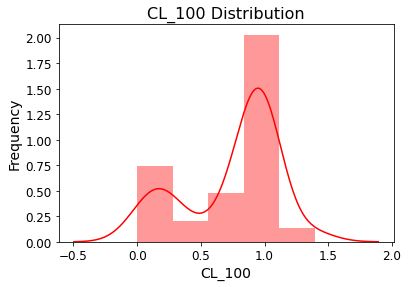

In [ ]:
sb.distplot(df['CL_100'], color = 'r')
plt.title('CL_100 Distribution', fontsize = 16)
plt.xlabel('CL_100', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

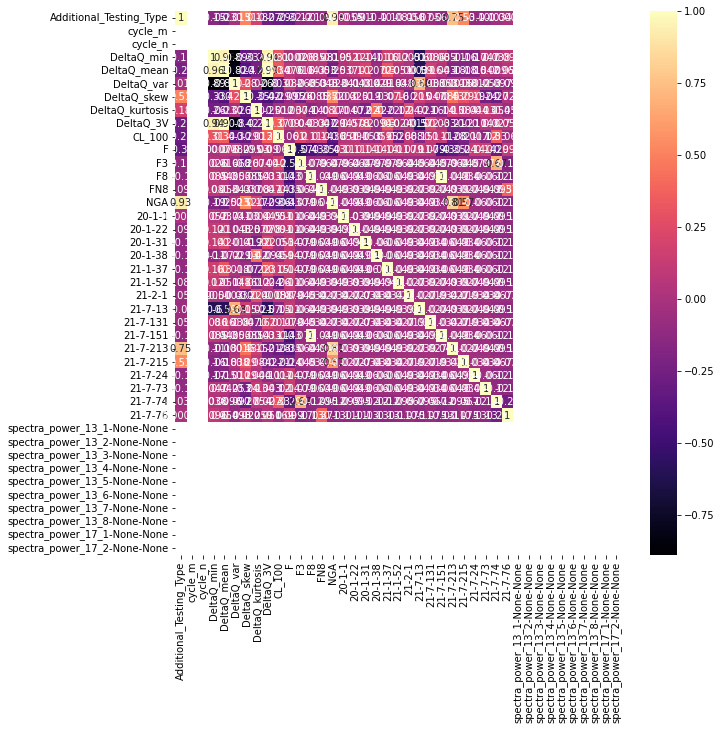

In [ ]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

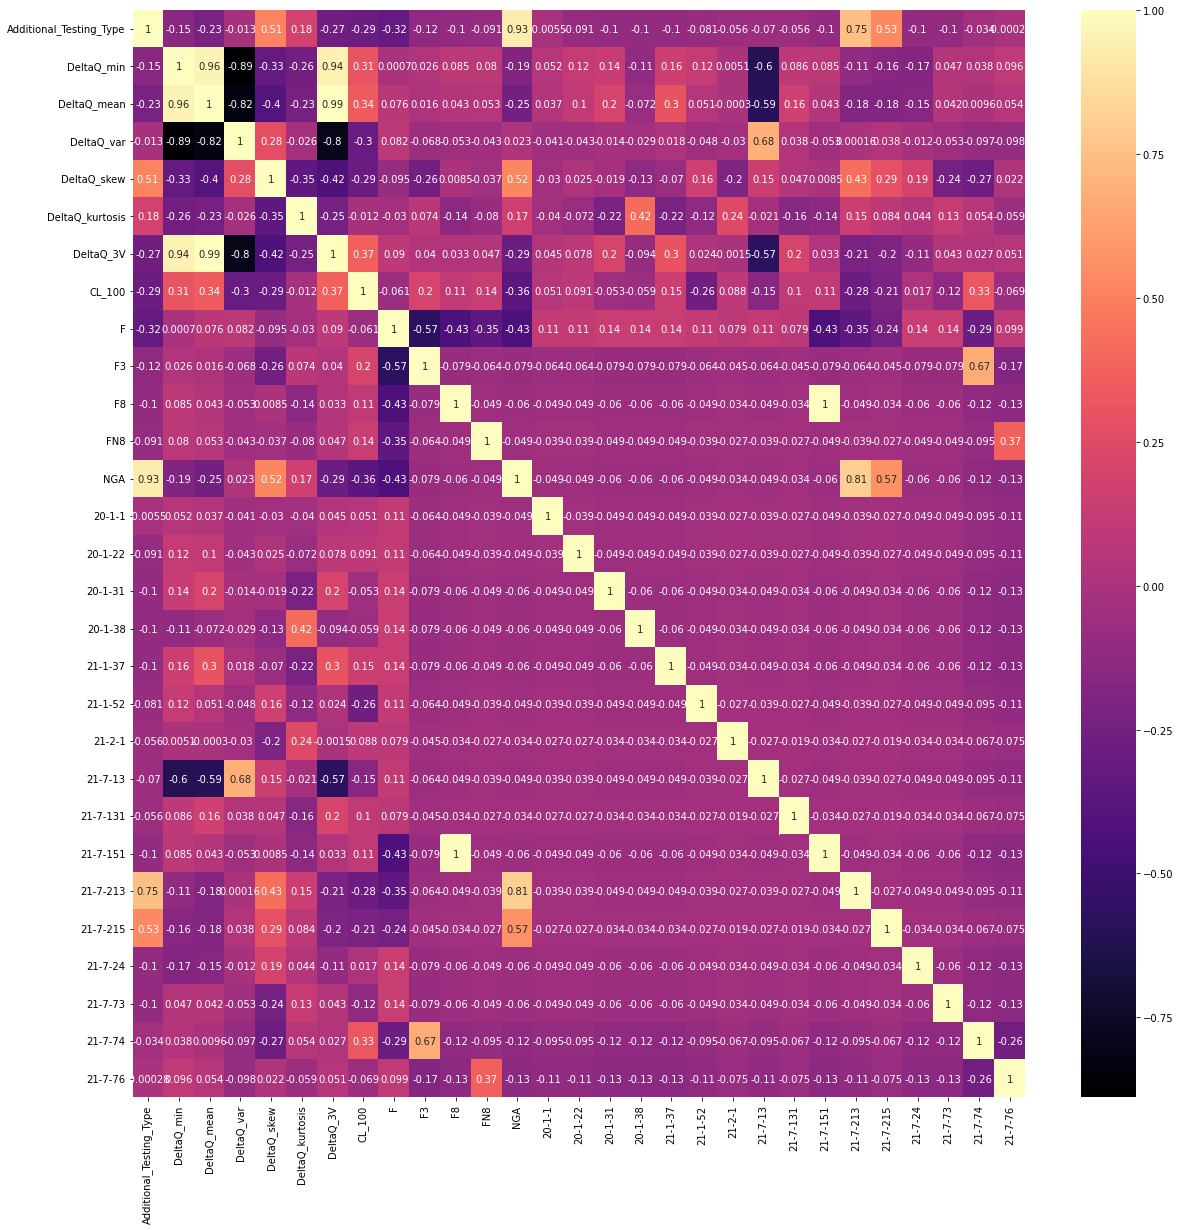

In [ ]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sb.heatmap(df.drop(['cycle_n','cycle_m','spectra_power_13_1-None-None','spectra_power_13_2-None-None','spectra_power_13_3-None-None','spectra_power_13_4-None-None','spectra_power_13_5-None-None','spectra_power_13_6-None-None','spectra_power_13_7-None-None','spectra_power_13_8-None-None','spectra_power_17_1-None-None','spectra_power_17_2-None-None'],axis = 1).corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

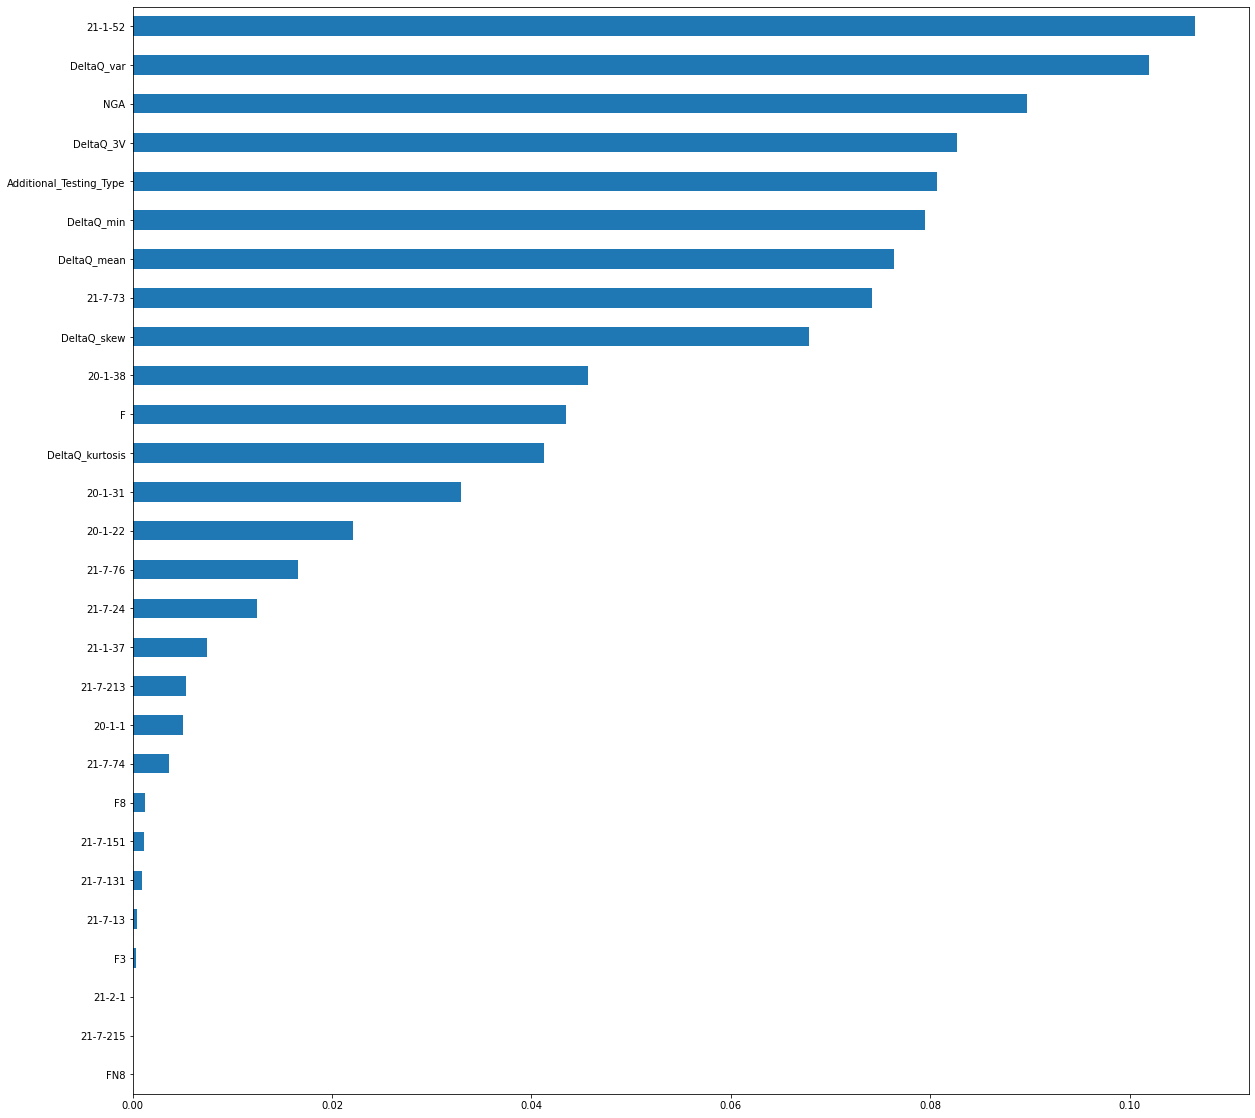

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
X_var = df.drop(['cycle_n','cycle_m','spectra_power_13_1-None-None','spectra_power_13_2-None-None','spectra_power_13_3-None-None','spectra_power_13_4-None-None','spectra_power_13_5-None-None','spectra_power_13_6-None-None','spectra_power_13_7-None-None','spectra_power_13_8-None-None','spectra_power_17_1-None-None','spectra_power_17_2-None-None','CL_100'],axis = 1).values
y_var = df['CL_100'].values
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
reg.feature_importances_
feat_importances = pd.Series(reg.feature_importances_, index=df.drop(['cycle_n','cycle_m','spectra_power_13_1-None-None','spectra_power_13_2-None-None','spectra_power_13_3-None-None','spectra_power_13_4-None-None','spectra_power_13_5-None-None','spectra_power_13_6-None-None','spectra_power_13_7-None-None','spectra_power_13_8-None-None','spectra_power_17_1-None-None','spectra_power_17_2-None-None','CL_100'],axis = 1).columns).sort_values()
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
feat_importances.plot(kind='barh')
plt.show()

In [ ]:
X_var = df.drop(['21-7-215','F3','FN8','21-2-1','cycle_n','cycle_m','spectra_power_13_1-None-None','spectra_power_13_2-None-None','spectra_power_13_3-None-None','spectra_power_13_4-None-None','spectra_power_13_5-None-None','spectra_power_13_6-None-None','spectra_power_13_7-None-None','spectra_power_13_8-None-None','spectra_power_17_1-None-None','spectra_power_17_2-None-None','CL_100'],axis = 1).values
y_var = df['CL_100'].values
#X_var = df[['Cell_Design_Type','Additional_Testing_Type','DeltaQ_min','DeltaQ_mean','DeltaQ_var','DeltaQ_kurtosis','DeltaQ_skew','DeltaQ_3V']].values


Defining different linear regression methods for estimation of best possible model.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[15:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

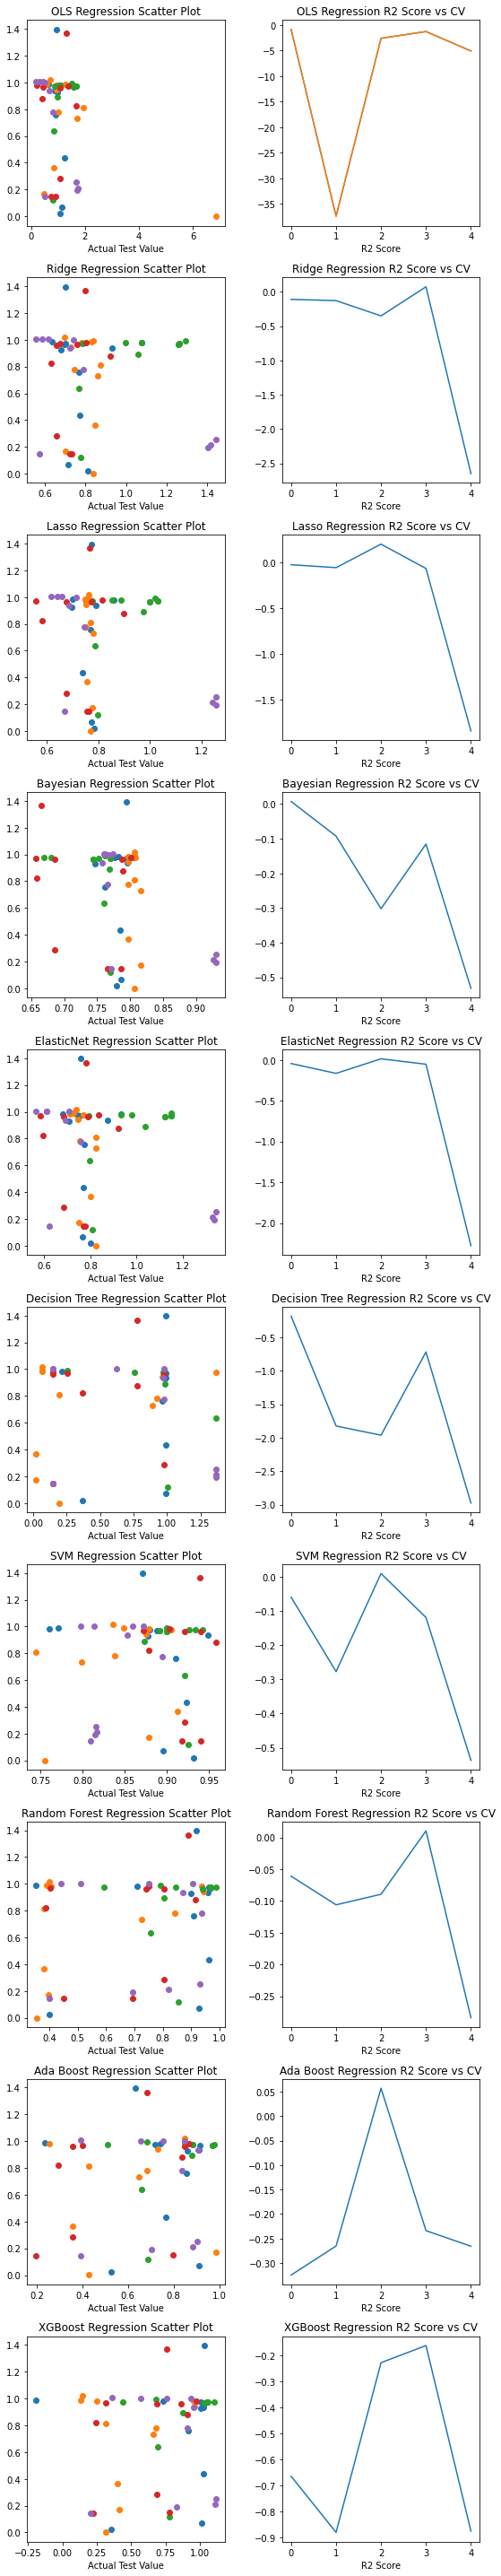

In [ ]:
lis=['ols','ridge','lasso','bayesian','en','dt','svm','RF','Ada','XGB']
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import RepeatedKFold,KFold,StratifiedKFold
kf=KFold(n_splits=5)
# 1. OLS
fig,ax=plt.subplots(10,2,figsize=(8,40))
ols = LinearRegression()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  ols.fit(X_train, y_train)
  ols_yhat = ols.predict(X_test)
  ax[0,0].scatter(ols_yhat,y_test)
  ax[0,0].set_xlabel("Predicted Test Value")
  ax[0,0].set_xlabel("Actual Test Value")
  ax[0,0].set_title("OLS Regression Scatter Plot")
ax[0,1].plot(cross_val_score(ols, X_var, y_var, cv=kf,scoring='r2'))
ax[0,1].plot(cross_val_score(ols, X_var, y_var, cv=kf,scoring='r2'))
ax[0,1].set_xlabel("Number of Folds")
ax[0,1].set_xlabel("R2 Score")
ax[0,1].set_title("OLS Regression R2 Score vs CV")
# 2. Ridge
ridge = Ridge(alpha = 0.5)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  ridge.fit(X_train, y_train)
  ridge_yhat = ridge.predict(X_test)
  ax[1,0].scatter(ridge_yhat,y_test)
  ax[1,0].set_xlabel("Predicted Test Value")
  ax[1,0].set_xlabel("Actual Test Value")
  ax[1,0].set_title("Ridge Regression Scatter Plot")
ax[1,1].plot(cross_val_score(ridge, X_var, y_var, cv=kf,scoring='r2'))
ax[1,1].set_xlabel("Number of Folds")
ax[1,1].set_xlabel("R2 Score")
ax[1,1].set_title("Ridge Regression R2 Score vs CV")

# 3. Lasso

lasso = Lasso(alpha = 0.01)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  lasso.fit(X_train, y_train)
  lasso_yhat = lasso.predict(X_test)
  ax[2,0].scatter(lasso_yhat,y_test)
  ax[2,0].set_xlabel("Predicted Test Value")
  ax[2,0].set_xlabel("Actual Test Value")
  ax[2,0].set_title("Lasso Regression Scatter Plot")
ax[2,1].plot(cross_val_score(lasso, X_var, y_var, cv=kf,scoring='r2'))
ax[2,1].set_xlabel("Number of Folds")
ax[2,1].set_xlabel("R2 Score")
ax[2,1].set_title("Lasso Regression R2 Score vs CV")

# 4. Bayesian

bayesian = BayesianRidge()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  bayesian.fit(X_train, y_train)
  bayesian_yhat = bayesian.predict(X_test)
  ax[3,0].scatter(bayesian_yhat,y_test)
  ax[3,0].set_xlabel("Predicted Test Value")
  ax[3,0].set_xlabel("Actual Test Value")
  ax[3,0].set_title("Bayesian Regression Scatter Plot")
ax[3,1].plot(cross_val_score(bayesian, X_var, y_var, cv=kf,scoring='r2'))
ax[3,1].set_xlabel("Number of Folds")
ax[3,1].set_xlabel("R2 Score")
ax[3,1].set_title("Bayesian Regression R2 Score vs CV")
# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  en.fit(X_train, y_train)
  en_yhat = en.predict(X_test)
  ax[4,0].scatter(en_yhat,y_test)
  ax[4,0].set_xlabel("Predicted Test Value")
  ax[4,0].set_xlabel("Actual Test Value")
  ax[4,0].set_title("ElasticNet Regression Scatter Plot")
ax[4,1].plot(cross_val_score(en, X_var, y_var, cv=kf,scoring='r2'))
ax[4,1].set_xlabel("Number of Folds")
ax[4,1].set_xlabel("R2 Score")
ax[4,1].set_title("ElasticNet Regression R2 Score vs CV")
# 6. Decision Tree Regression
dt=DecisionTreeRegressor()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  dt.fit(X_train, y_train)
  dt_yhat = dt.predict(X_test)
  ax[5,0].scatter(dt_yhat,y_test)
  ax[5,0].set_xlabel("Predicted Test Value")
  ax[5,0].set_xlabel("Actual Test Value")
  ax[5,0].set_title("Decision Tree Regression Scatter Plot")
ax[5,1].plot(cross_val_score(dt, X_var, y_var, cv=kf,scoring='r2'))
ax[5,1].set_xlabel("Number of Folds")
ax[5,1].set_xlabel("R2 Score")
ax[5,1].set_title("Decision Tree Regression R2 Score vs CV")
# 7. Support Vector Machines
from sklearn.svm import SVR
sv = SVR(kernel='rbf')
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  X = sc_X.fit_transform(X_train)
  y = sc_y.fit_transform(y_train.reshape(-1,1))
  sv.fit(X,y)
  svm_yhat = sc_y.inverse_transform ((sv.predict (sc_X.transform(X_test))).reshape(-1,1))
  ax[6,0].scatter(svm_yhat,y_test)
  ax[6,0].set_xlabel("Predicted Test Value")
  ax[6,0].set_xlabel("Actual Test Value")
  ax[6,0].set_title("SVM Regression Scatter Plot")
ax[6,1].plot(cross_val_score(sv, X_var, y_var, cv=kf,scoring='r2'))
ax[6,1].set_xlabel("Number of Folds")
ax[6,1].set_xlabel("R2 Score")
ax[6,1].set_title("SVM Regression R2 Score vs CV")

#RandomForest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=6, random_state=0)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  reg.fit(X_train, y_train)
  reg_yhat = reg.predict(X_test)
  ax[7,0].scatter(reg_yhat,y_test)
  ax[7,0].set_xlabel("Predicted Test Value")
  ax[7,0].set_xlabel("Actual Test Value")
  ax[7,0].set_title("Random Forest Regression Scatter Plot")
ax[7,1].plot(cross_val_score(reg, X_var, y_var, cv=kf,scoring='r2'))
ax[7,1].set_xlabel("Number of Folds")
ax[7,1].set_xlabel("R2 Score")
ax[7,1].set_title("Random Forest Regression R2 Score vs CV")
#AdaBoostRegression
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=500)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  regr.fit(X_train, y_train)
  regr_yhat = regr.predict(X_test)
  ax[8,0].scatter(regr_yhat,y_test)
  ax[8,0].set_xlabel("Predicted Test Value")
  ax[8,0].set_xlabel("Actual Test Value")
  ax[8,0].set_title("Ada Boost Regression Scatter Plot")
ax[8,1].plot(cross_val_score(regr, X_var, y_var, cv=kf,scoring='r2'))
ax[8,1].set_xlabel("Number of Folds")
ax[8,1].set_xlabel("R2 Score")
ax[8,1].set_title("Ada Boost Regression R2 Score vs CV")
#XGBoost
from xgboost import XGBRegressor
regx = XGBRegressor()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  regx.fit(X_train, y_train)
  regx_yhat = regx.predict(X_test)
  ax[9,0].scatter(regx_yhat,y_test)
  ax[9,0].set_xlabel("Predicted Test Value")
  ax[9,0].set_xlabel("Actual Test Value")
  ax[9,0].set_title("XGBoost Regression Scatter Plot")
ax[9,1].plot(cross_val_score(regx, X_var, y_var, cv=kf,scoring='r2'))
ax[9,1].set_xlabel("Number of Folds")
ax[9,1].set_xlabel("R2 Score")
ax[9,1].set_title("XGBoost Regression R2 Score vs CV")
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 20, min_delta = 0.000001, restore_best_weights =True )

Epoch 1/1000
2/2 [==============================] - 3s 360ms/step - loss: 0.6773 - root_mean_squared_error: 0.8230 - val_loss: 0.2570 - val_root_mean_squared_error: 0.5070
Epoch 2/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.3406 - root_mean_squared_error: 0.5836 - val_loss: 0.1701 - val_root_mean_squared_error: 0.4124
Epoch 3/1000
2/2 [==============================] - 0s 70ms/step - loss: 0.3595 - root_mean_squared_error: 0.5996 - val_loss: 0.2623 - val_root_mean_squared_error: 0.5122
Epoch 4/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.2822 - root_mean_squared_error: 0.5312 - val_loss: 0.2974 - val_root_mean_squared_error: 0.5453
Epoch 5/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.2159 - root_mean_squared_error: 0.4646 - val_loss: 0.2210 - val_root_mean_squared_error: 0.4701
Epoch 6/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.1582 - root_mean_squared_error: 0.3977 - val_loss: 0.1801 - val_root_

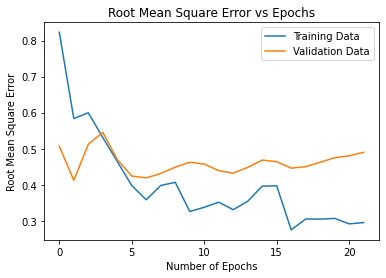

Epoch 1/1000
2/2 [==============================] - 0s 124ms/step - loss: 0.2271 - root_mean_squared_error: 0.4766 - val_loss: 0.2373 - val_root_mean_squared_error: 0.4871
Epoch 2/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.2685 - root_mean_squared_error: 0.5181 - val_loss: 0.2524 - val_root_mean_squared_error: 0.5024
Epoch 3/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.2074 - root_mean_squared_error: 0.4554 - val_loss: 0.2737 - val_root_mean_squared_error: 0.5231
Epoch 4/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.2098 - root_mean_squared_error: 0.4581 - val_loss: 0.3134 - val_root_mean_squared_error: 0.5598
Epoch 5/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.1894 - root_mean_squared_error: 0.4352 - val_loss: 0.3707 - val_root_mean_squared_error: 0.6088
Epoch 6/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.1761 - root_mean_squared_error: 0.4196 - val_loss: 0.3987 - val_root_

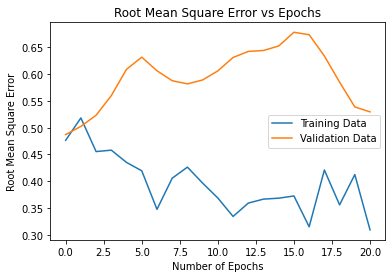

Epoch 1/1000
2/2 [==============================] - 0s 120ms/step - loss: 0.1852 - root_mean_squared_error: 0.4304 - val_loss: 0.1934 - val_root_mean_squared_error: 0.4398
Epoch 2/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.1836 - root_mean_squared_error: 0.4285 - val_loss: 0.1936 - val_root_mean_squared_error: 0.4400
Epoch 3/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.2753 - root_mean_squared_error: 0.5247 - val_loss: 0.1973 - val_root_mean_squared_error: 0.4442
Epoch 4/1000
2/2 [==============================] - 0s 83ms/step - loss: 0.2252 - root_mean_squared_error: 0.4745 - val_loss: 0.1894 - val_root_mean_squared_error: 0.4352
Epoch 5/1000
2/2 [==============================] - 0s 126ms/step - loss: 0.1654 - root_mean_squared_error: 0.4066 - val_loss: 0.1789 - val_root_mean_squared_error: 0.4230
Epoch 6/1000
2/2 [==============================] - 0s 147ms/step - loss: 0.1571 - root_mean_squared_error: 0.3963 - val_loss: 0.1778 - val_roo

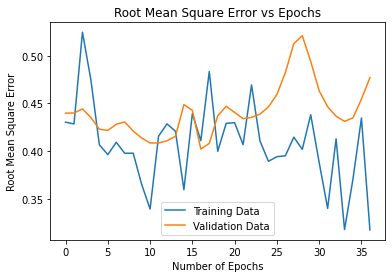

Epoch 1/1000
2/2 [==============================] - 0s 122ms/step - loss: 0.1581 - root_mean_squared_error: 0.3976 - val_loss: 0.1409 - val_root_mean_squared_error: 0.3753
Epoch 2/1000
2/2 [==============================] - 0s 54ms/step - loss: 0.1549 - root_mean_squared_error: 0.3935 - val_loss: 0.1461 - val_root_mean_squared_error: 0.3823
Epoch 3/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.1796 - root_mean_squared_error: 0.4238 - val_loss: 0.1159 - val_root_mean_squared_error: 0.3404
Epoch 4/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.1770 - root_mean_squared_error: 0.4207 - val_loss: 0.0982 - val_root_mean_squared_error: 0.3134
Epoch 5/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.0995 - root_mean_squared_error: 0.3154 - val_loss: 0.1215 - val_root_mean_squared_error: 0.3486
Epoch 6/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.2005 - root_mean_squared_error: 0.4477 - val_loss: 0.1509 - val_root_

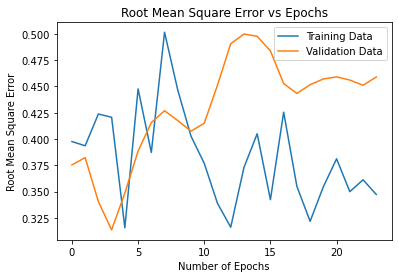

Epoch 1/1000
2/2 [==============================] - 0s 117ms/step - loss: 0.1618 - root_mean_squared_error: 0.4023 - val_loss: 0.1041 - val_root_mean_squared_error: 0.3227
Epoch 2/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.1329 - root_mean_squared_error: 0.3645 - val_loss: 0.1047 - val_root_mean_squared_error: 0.3236
Epoch 3/1000
2/2 [==============================] - 0s 53ms/step - loss: 0.1251 - root_mean_squared_error: 0.3537 - val_loss: 0.1123 - val_root_mean_squared_error: 0.3350
Epoch 4/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.1193 - root_mean_squared_error: 0.3454 - val_loss: 0.1200 - val_root_mean_squared_error: 0.3464
Epoch 5/1000
2/2 [==============================] - 0s 67ms/step - loss: 0.1551 - root_mean_squared_error: 0.3938 - val_loss: 0.1207 - val_root_mean_squared_error: 0.3474
Epoch 6/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.2085 - root_mean_squared_error: 0.4566 - val_loss: 0.1123 - val_root_

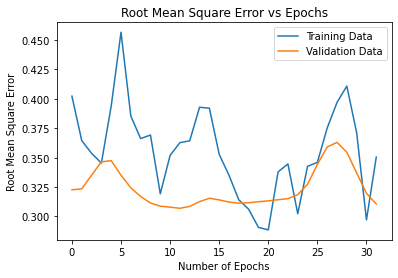

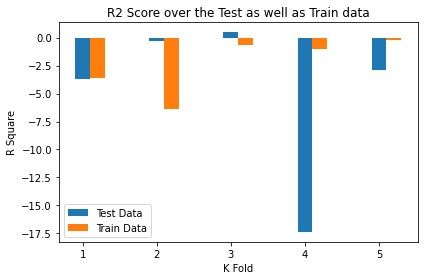

In [ ]:
from functools import partial
from keras.layers import PReLU
from keras.initializers import Constant
import tensorflow as tf
from sklearn.metrics import r2_score as r2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
n_in=X_var.shape[1]
def create_model(n_inputs,n_outputs=1):
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim=n_inputs))
    model.add(Dropout(0.2))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.1))
    #model.add(PReLU(alpha_initializer=Constant(value=0.25)))
    #model.add(Dense(n_outputs,activation=partial(tf.nn.leaky_relu, alpha=0.01)))
    model.add(Dense(n_outputs,activation='linear'))

    model.compile( optimizer='adam',loss='mse', metrics=['RootMeanSquaredError'])
    return model
regressor = create_model(n_inputs=n_in)
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaller = StandardScaler()
j=1
r2t=[]
r2tr=[]
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  x_train_scaled = scaller.fit_transform(X_train)
  x_test_scaled = scaller.transform(X_test)
  history  = regressor.fit(x_train_scaled,
               y_train,
               epochs=1000,
               validation_split=0.2,
               callbacks=[early_stopping],
               verbose=1)
  plt.plot(history.history['root_mean_squared_error'])
  plt.plot(history.history['val_root_mean_squared_error'])
  plt.title("Root Mean Square Error vs Epochs")
  plt.xlabel("Number of Epochs")
  plt.ylabel("Root Mean Square Error")
  plt.legend(['Training Data','Validation Data'])
  plt.show()
  y_pred = regressor.predict(x_test_scaled)
  y_predt = regressor.predict(x_train_scaled)
  r2t.append(r2(y_pred,y_test))
  r2tr.append(r2(y_predt,y_train))
  j=j+1
x=np.arange(1,len(r2t)+1)
x1=[x+0.2 for x in x]
plt.bar(x,r2t,width=0.2)
plt.bar(x1,r2tr,width=0.2)
plt.legend(["Test Data","Train Data"])
plt.title("R2 Score over the Test as well as Train data")
plt.xlabel("K Fold")
plt.ylabel("R Square")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[15:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

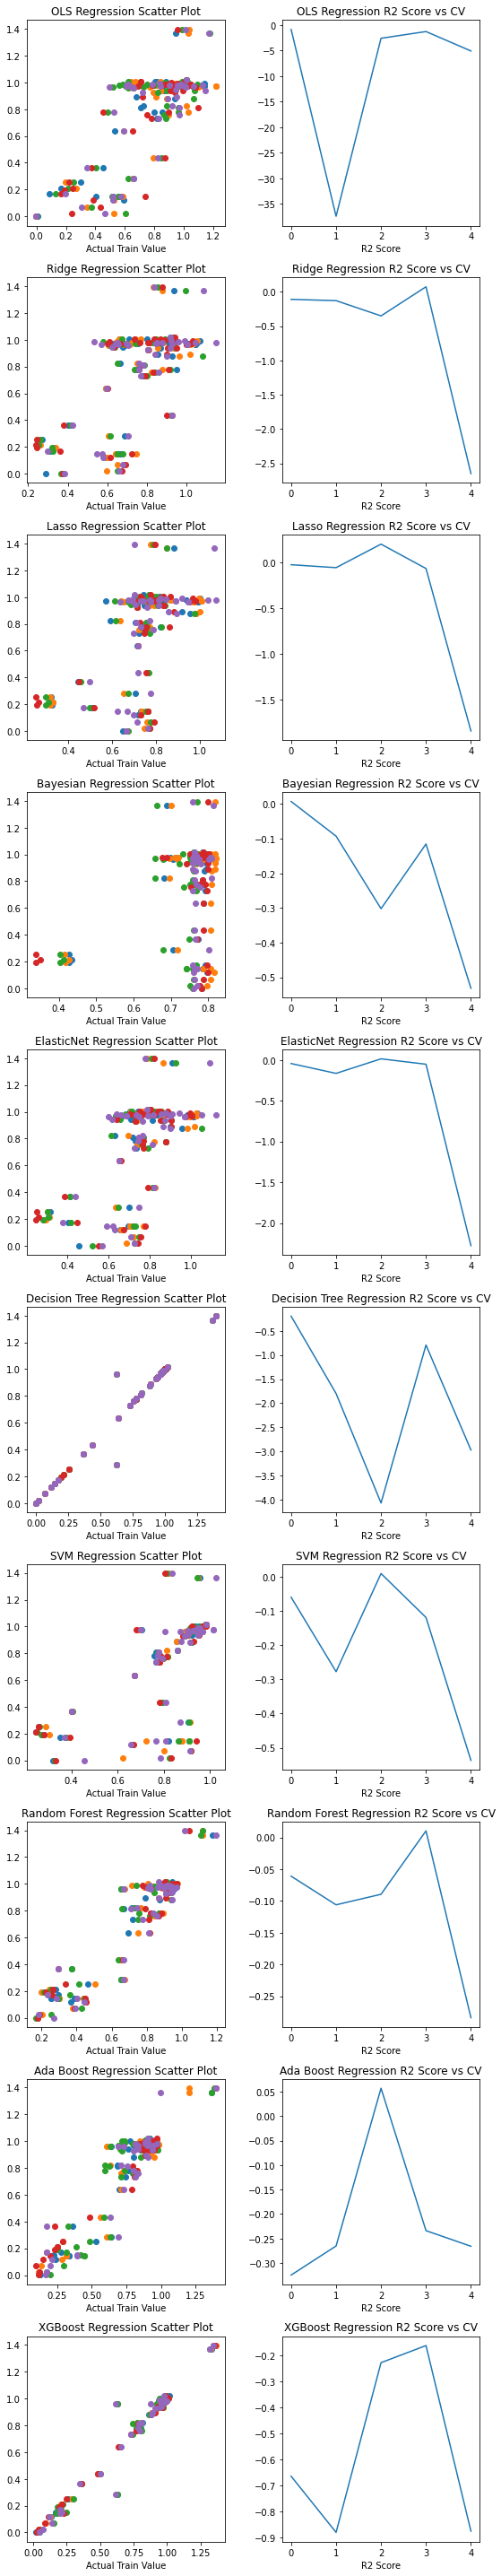

In [ ]:
lis=['ols','ridge','lasso','bayesian','en','dt','svm','RF','Ada','XGB']
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import RepeatedKFold,KFold,StratifiedKFold
kf=KFold(n_splits=5)
# 1. OLS
fig,ax=plt.subplots(10,2,figsize=(8,40))
ols = LinearRegression()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  ols.fit(X_train, y_train)
  ols_yhat = ols.predict(X_train)
  ax[0,0].scatter(ols_yhat,y_train)
  ax[0,0].set_xlabel("Predicted Train Value")
  ax[0,0].set_xlabel("Actual Train Value")
  ax[0,0].set_title("OLS Regression Scatter Plot")
ax[0,1].plot(cross_val_score(ols, X_var, y_var, cv=kf,scoring='r2'))
ax[0,1].set_xlabel("Number of Folds")
ax[0,1].set_xlabel("R2 Score")
ax[0,1].set_title("OLS Regression R2 Score vs CV")
# 2. Ridge
ridge = Ridge(alpha = 0.5)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  ridge.fit(X_train, y_train)
  ridge_yhat = ridge.predict(X_train)
  ax[1,0].scatter(ridge_yhat,y_train)
  ax[1,0].set_xlabel("Predicted Train Value")
  ax[1,0].set_xlabel("Actual Train Value")
  ax[1,0].set_title("Ridge Regression Scatter Plot")
ax[1,1].plot(cross_val_score(ridge, X_var, y_var, cv=kf,scoring='r2'))
ax[1,1].set_xlabel("Number of Folds")
ax[1,1].set_xlabel("R2 Score")
ax[1,1].set_title("Ridge Regression R2 Score vs CV")

# 3. Lasso

lasso = Lasso(alpha = 0.01)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  lasso.fit(X_train, y_train)
  lasso_yhat = lasso.predict(X_train)
  ax[2,0].scatter(lasso_yhat,y_train)
  ax[2,0].set_xlabel("Predicted Train Value")
  ax[2,0].set_xlabel("Actual Train Value")
  ax[2,0].set_title("Lasso Regression Scatter Plot")
ax[2,1].plot(cross_val_score(lasso, X_var, y_var, cv=kf,scoring='r2'))
ax[2,1].set_xlabel("Number of Folds")
ax[2,1].set_xlabel("R2 Score")
ax[2,1].set_title("Lasso Regression R2 Score vs CV")

# 4. Bayesian

bayesian = BayesianRidge()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  bayesian.fit(X_train, y_train)
  bayesian_yhat = bayesian.predict(X_train)
  ax[3,0].scatter(bayesian_yhat,y_train)
  ax[3,0].set_xlabel("Predicted Train Value")
  ax[3,0].set_xlabel("Actual Train Value")
  ax[3,0].set_title("Bayesian Regression Scatter Plot")
ax[3,1].plot(cross_val_score(bayesian, X_var, y_var, cv=kf,scoring='r2'))
ax[3,1].set_xlabel("Number of Folds")
ax[3,1].set_xlabel("R2 Score")
ax[3,1].set_title("Bayesian Regression R2 Score vs CV")
# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  en.fit(X_train, y_train)
  en_yhat = en.predict(X_train)
  ax[4,0].scatter(en_yhat,y_train)
  ax[4,0].set_xlabel("Predicted Train Value")
  ax[4,0].set_xlabel("Actual Train Value")
  ax[4,0].set_title("ElasticNet Regression Scatter Plot")
ax[4,1].plot(cross_val_score(en, X_var, y_var, cv=kf,scoring='r2'))
ax[4,1].set_xlabel("Number of Folds")
ax[4,1].set_xlabel("R2 Score")
ax[4,1].set_title("ElasticNet Regression R2 Score vs CV")
# 6. Decision Tree Regression
dt=DecisionTreeRegressor()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  dt.fit(X_train, y_train)
  dt_yhat = dt.predict(X_train)
  ax[5,0].scatter(dt_yhat,y_train)
  ax[5,0].set_xlabel("Predicted Train Value")
  ax[5,0].set_xlabel("Actual Train Value")
  ax[5,0].set_title("Decision Tree Regression Scatter Plot")
ax[5,1].plot(cross_val_score(dt, X_var, y_var, cv=kf,scoring='r2'))
ax[5,1].set_xlabel("Number of Folds")
ax[5,1].set_xlabel("R2 Score")
ax[5,1].set_title("Decision Tree Regression R2 Score vs CV")
# 7. Support Vector Machines
from sklearn.svm import SVR
sv = SVR(kernel='rbf')
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  X = sc_X.fit_transform(X_train)
  y = sc_y.fit_transform(y_train.reshape(-1,1))
  sv.fit(X,y)
  svm_yhat = sc_y.inverse_transform ((sv.predict (sc_X.transform(X_train))).reshape(-1,1))
  ax[6,0].scatter(svm_yhat,y_train)
  ax[6,0].set_xlabel("Predicted Train Value")
  ax[6,0].set_xlabel("Actual Train Value")
  ax[6,0].set_title("SVM Regression Scatter Plot")
ax[6,1].plot(cross_val_score(sv, X_var, y_var, cv=kf,scoring='r2'))
ax[6,1].set_xlabel("Number of Folds")
ax[6,1].set_xlabel("R2 Score")
ax[6,1].set_title("SVM Regression R2 Score vs CV")

#RandomForest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth=6, random_state=0)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  reg.fit(X_train, y_train)
  reg_yhat = reg.predict(X_train)
  ax[7,0].scatter(reg_yhat,y_train)
  ax[7,0].set_xlabel("Predicted Train Value")
  ax[7,0].set_xlabel("Actual Train Value")
  ax[7,0].set_title("Random Forest Regression Scatter Plot")
ax[7,1].plot(cross_val_score(reg, X_var, y_var, cv=kf,scoring='r2'))
ax[7,1].set_xlabel("Number of Folds")
ax[7,1].set_xlabel("R2 Score")
ax[7,1].set_title("Random Forest Regression R2 Score vs CV")
#AdaBoostRegression
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=500)
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  regr.fit(X_train, y_train)
  regr_yhat = regr.predict(X_train)
  ax[8,0].scatter(regr_yhat,y_train)
  ax[8,0].set_xlabel("Predicted Train Value")
  ax[8,0].set_xlabel("Actual Train Value")
  ax[8,0].set_title("Ada Boost Regression Scatter Plot")
ax[8,1].plot(cross_val_score(regr, X_var, y_var, cv=kf,scoring='r2'))
ax[8,1].set_xlabel("Number of Folds")
ax[8,1].set_xlabel("R2 Score")
ax[8,1].set_title("Ada Boost Regression R2 Score vs CV")
#XGBoost
from xgboost import XGBRegressor
regx = XGBRegressor()
for train_index, test_index in kf.split(X_var):
  X_train, X_test = X_var[train_index], X_var[test_index]
  y_train, y_test = y_var[train_index], y_var[test_index]
  regx.fit(X_train, y_train)
  regx_yhat = regx.predict(X_train)
  ax[9,0].scatter(regx_yhat,y_train)
  ax[9,0].set_xlabel("Predicted Train Value")
  ax[9,0].set_xlabel("Actual Train Value")
  ax[9,0].set_title("XGBoost Regression Scatter Plot")
ax[9,1].plot(cross_val_score(regx, X_var, y_var, cv=kf,scoring='r2'))
ax[9,1].set_xlabel("Number of Folds")
ax[9,1].set_xlabel("R2 Score")
ax[9,1].set_title("XGBoost Regression R2 Score vs CV")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


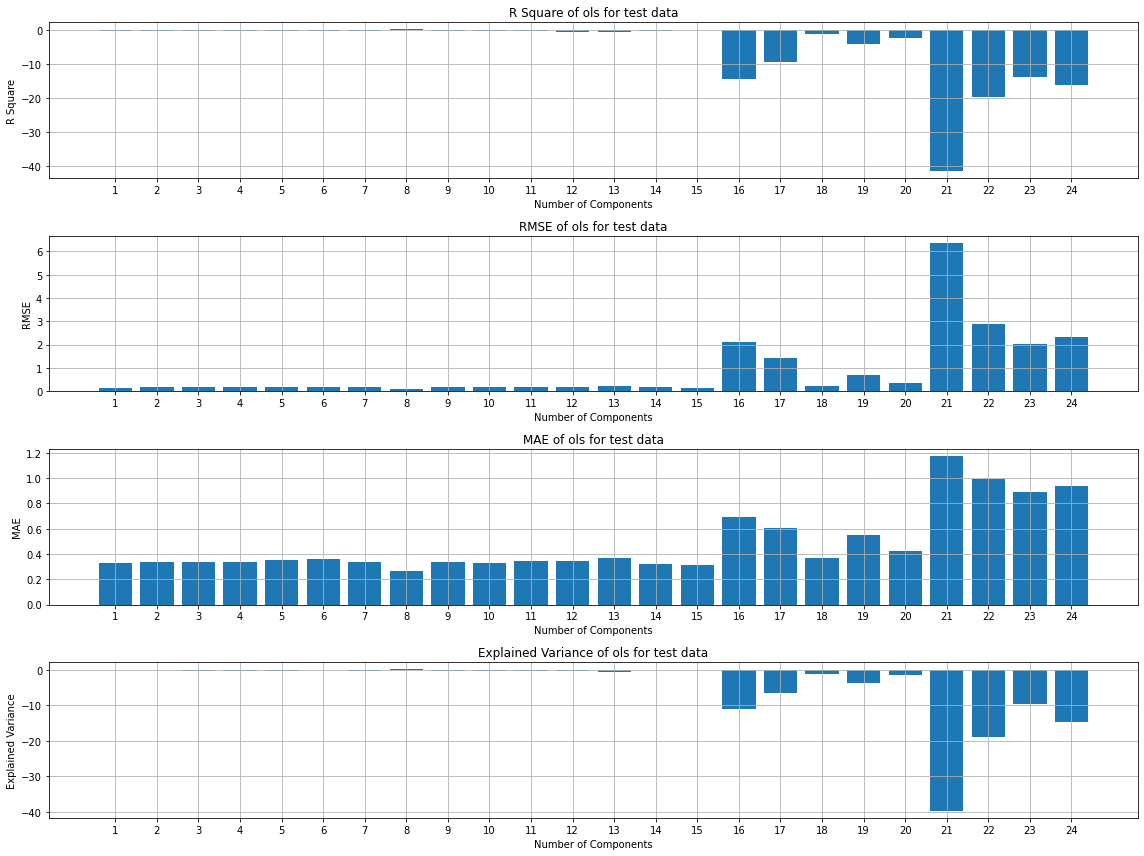

<Figure size 432x288 with 0 Axes>

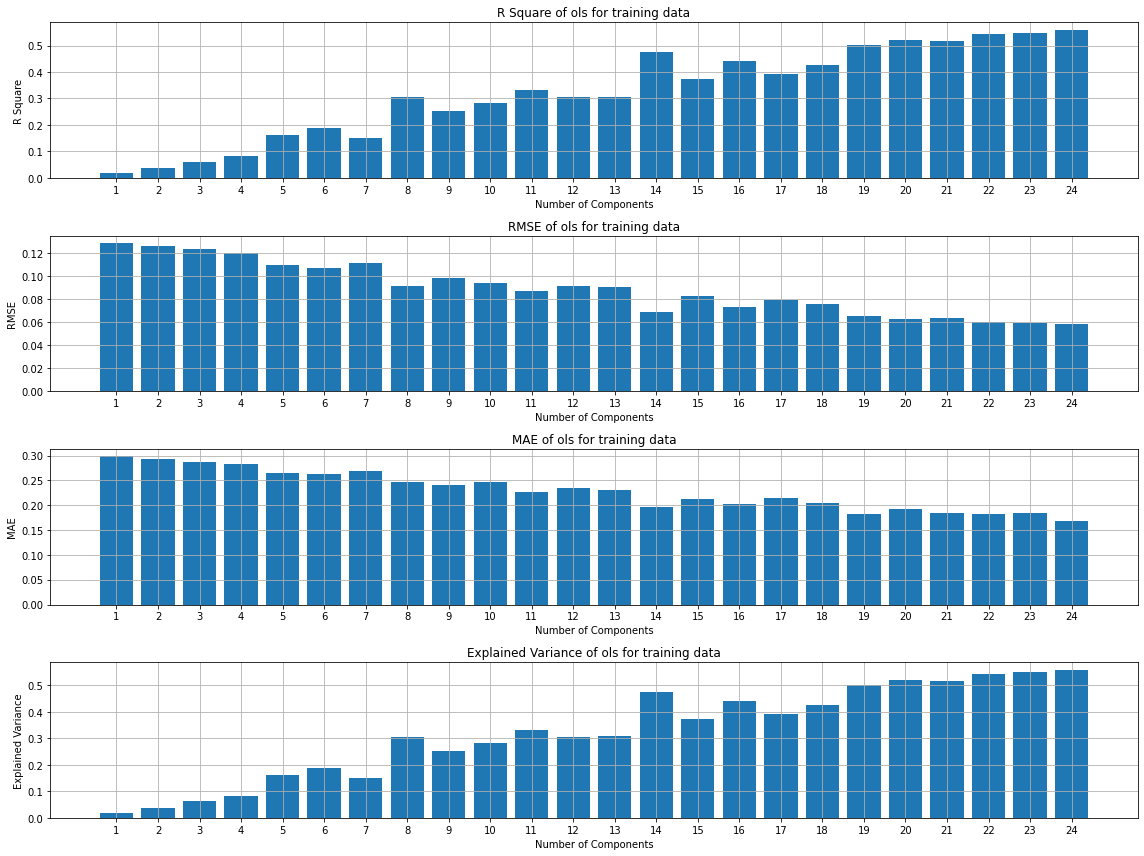

<Figure size 432x288 with 0 Axes>

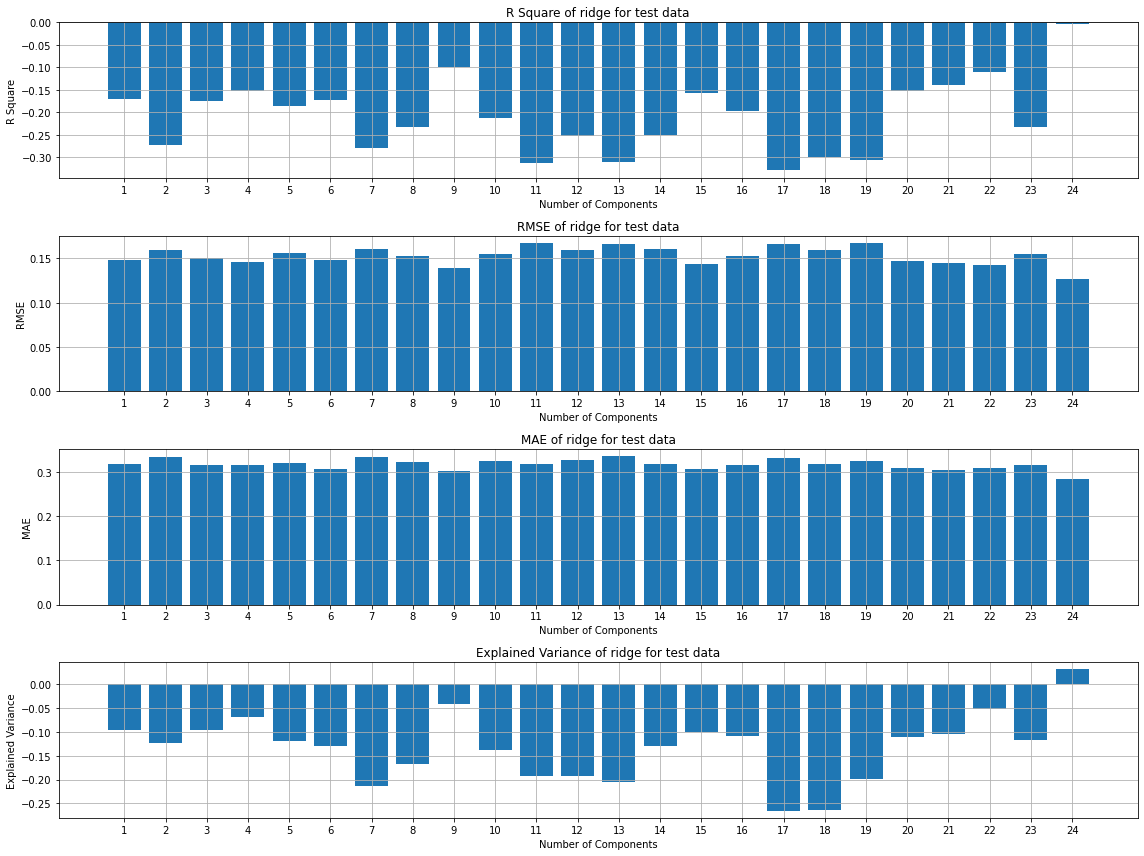

<Figure size 432x288 with 0 Axes>

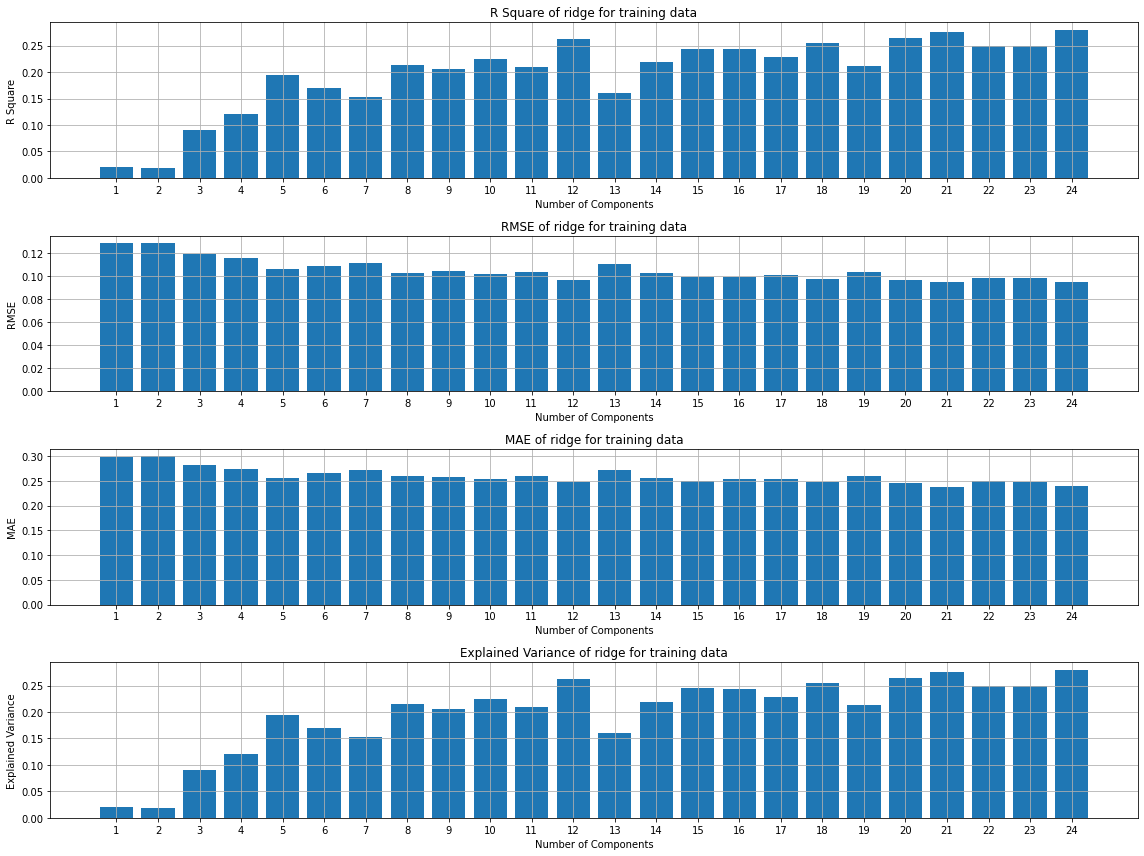

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e-03, tolerance: 5.194e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e-03, tolerance: 5.653e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


<Figure size 432x288 with 0 Axes>

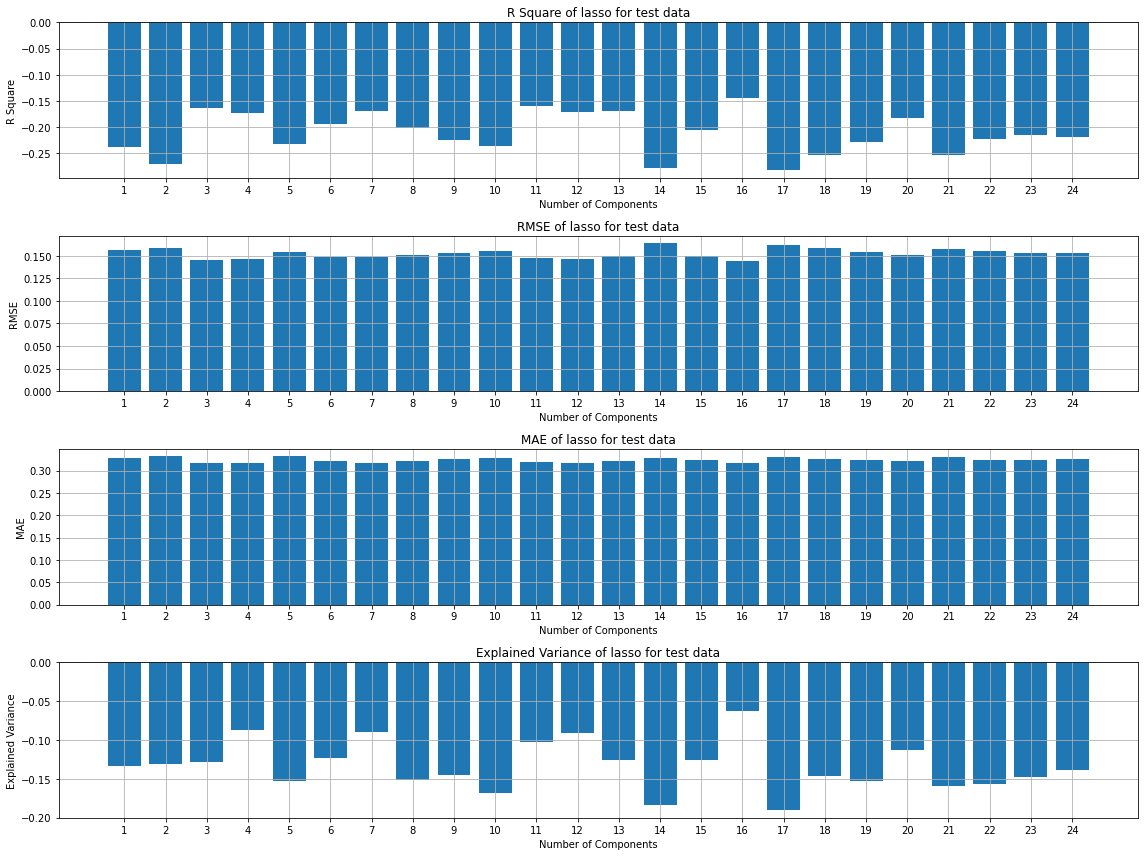

<Figure size 432x288 with 0 Axes>

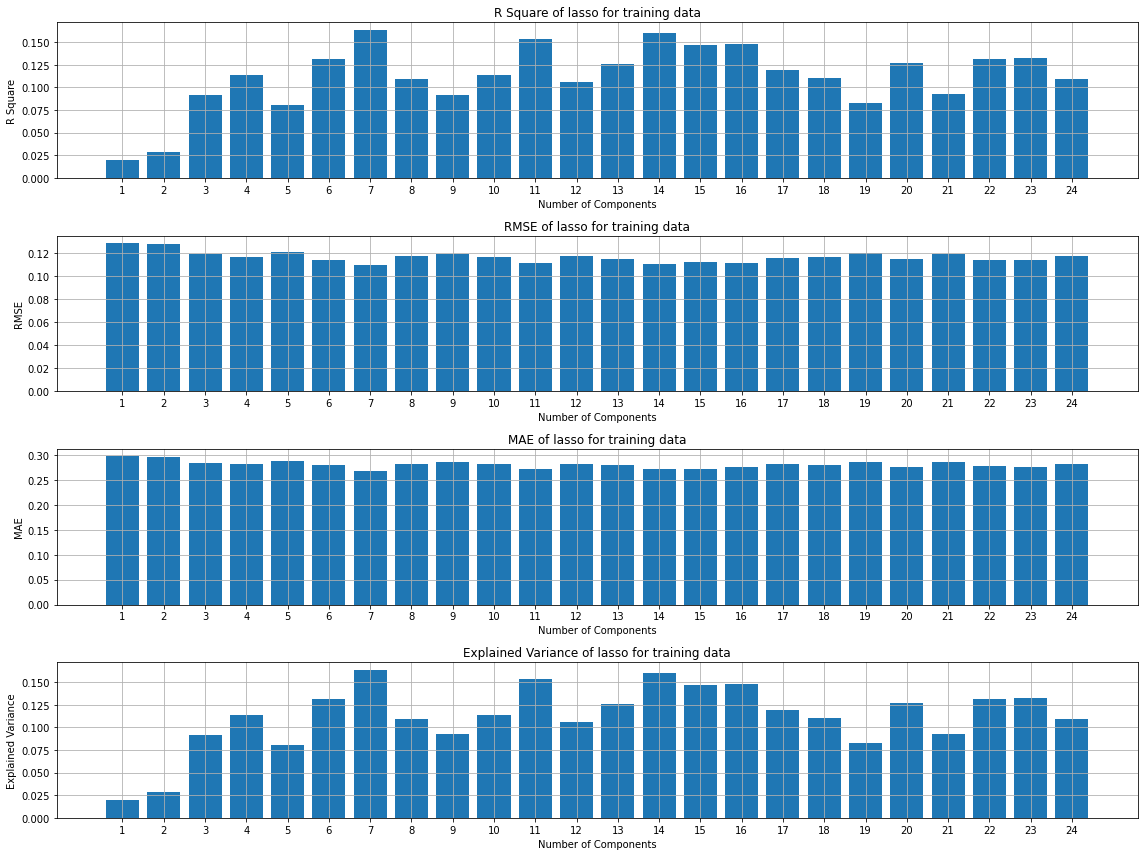

<Figure size 432x288 with 0 Axes>

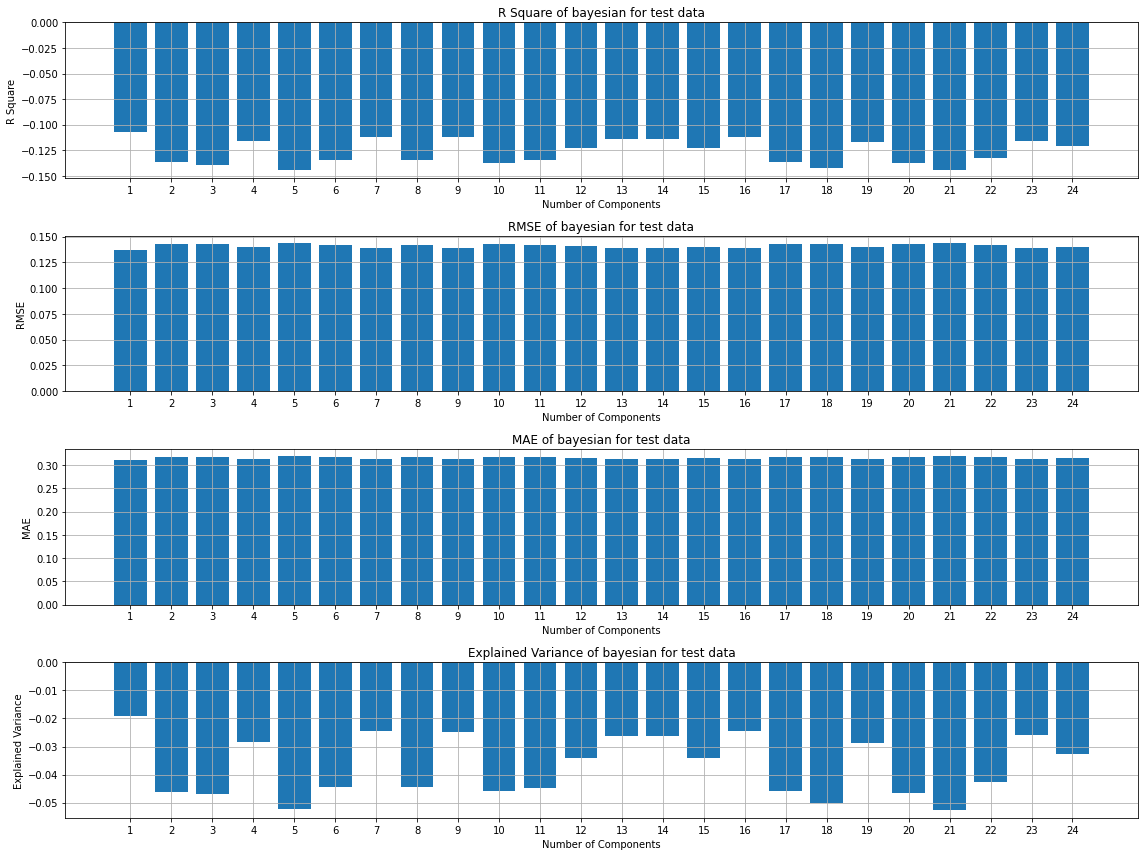

<Figure size 432x288 with 0 Axes>

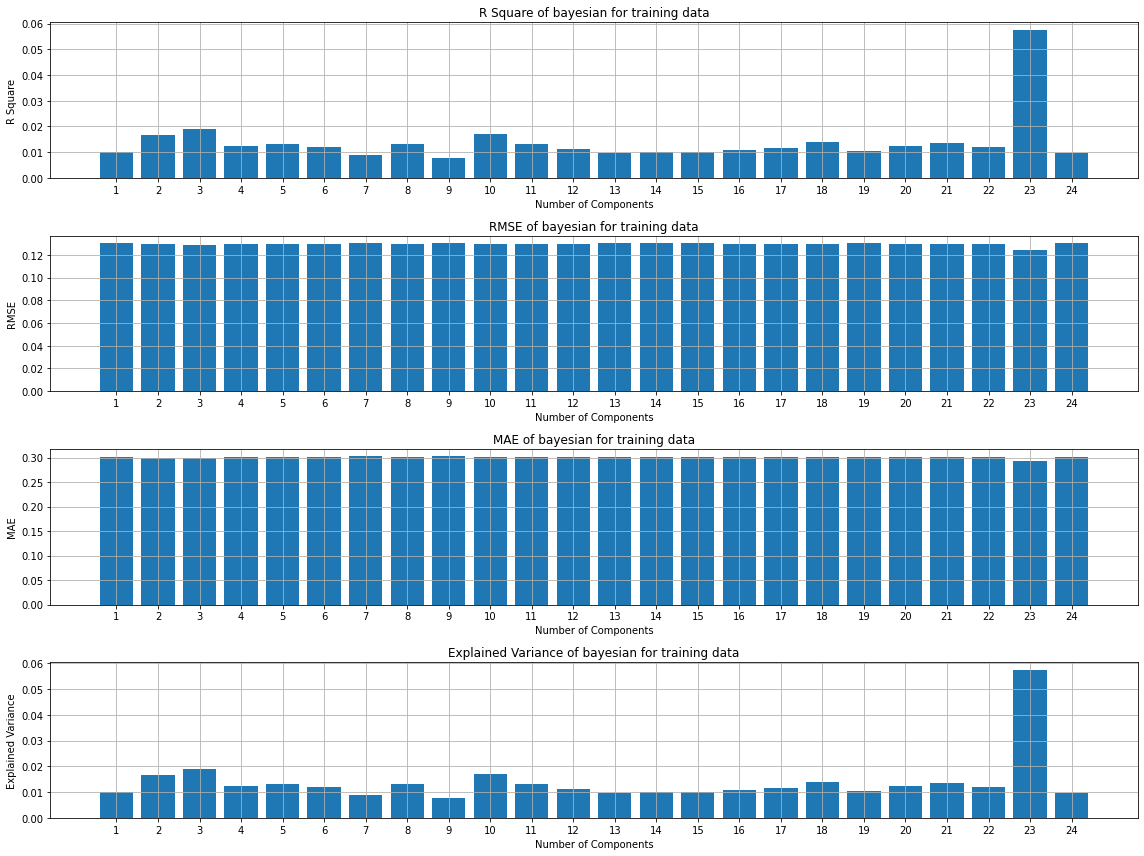

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.509e-04, tolerance: 5.194e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e-03, tolerance: 5.653e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

<Figure size 432x288 with 0 Axes>

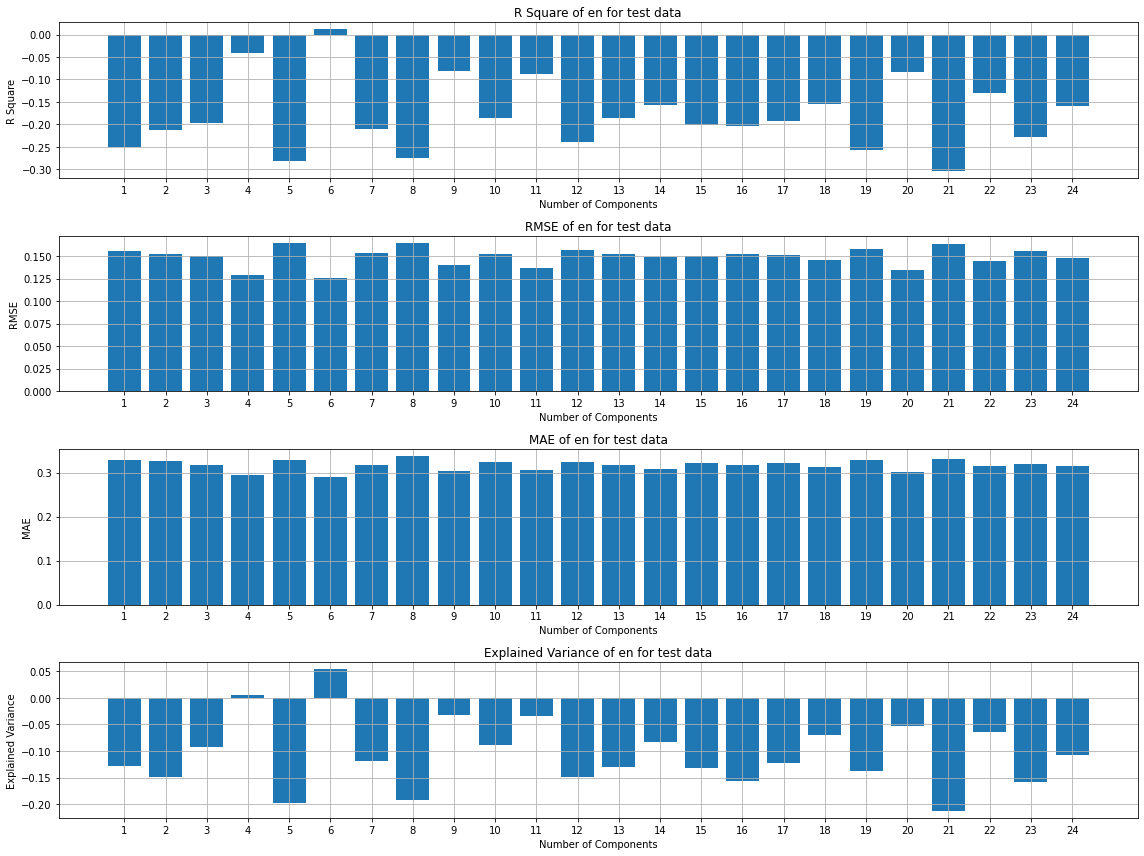

<Figure size 432x288 with 0 Axes>

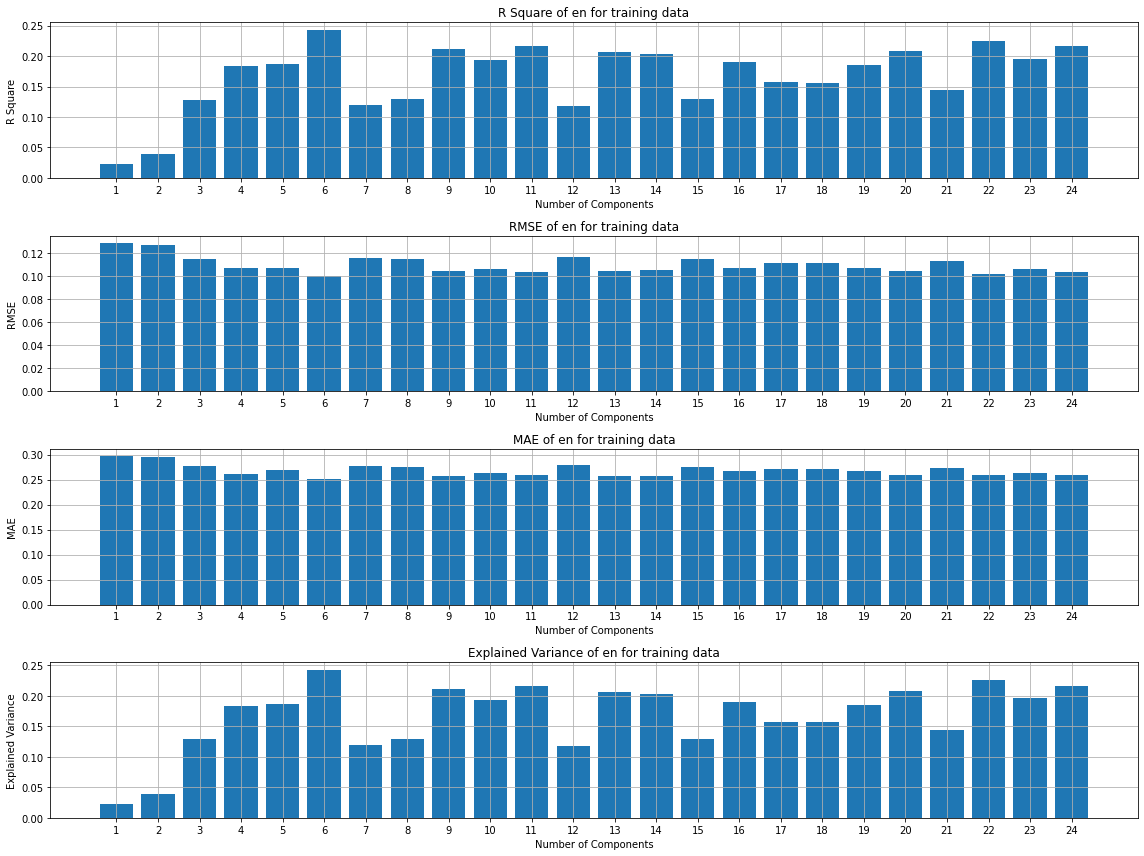

<Figure size 432x288 with 0 Axes>

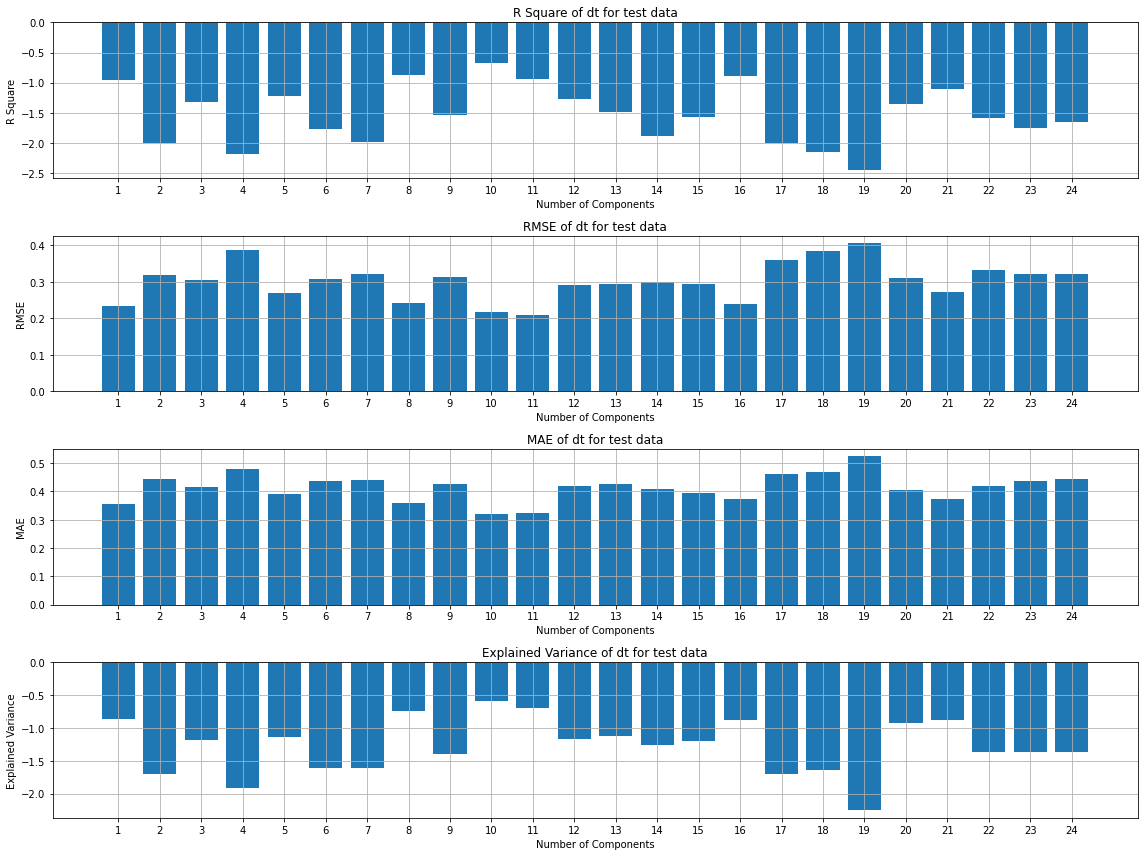

<Figure size 432x288 with 0 Axes>

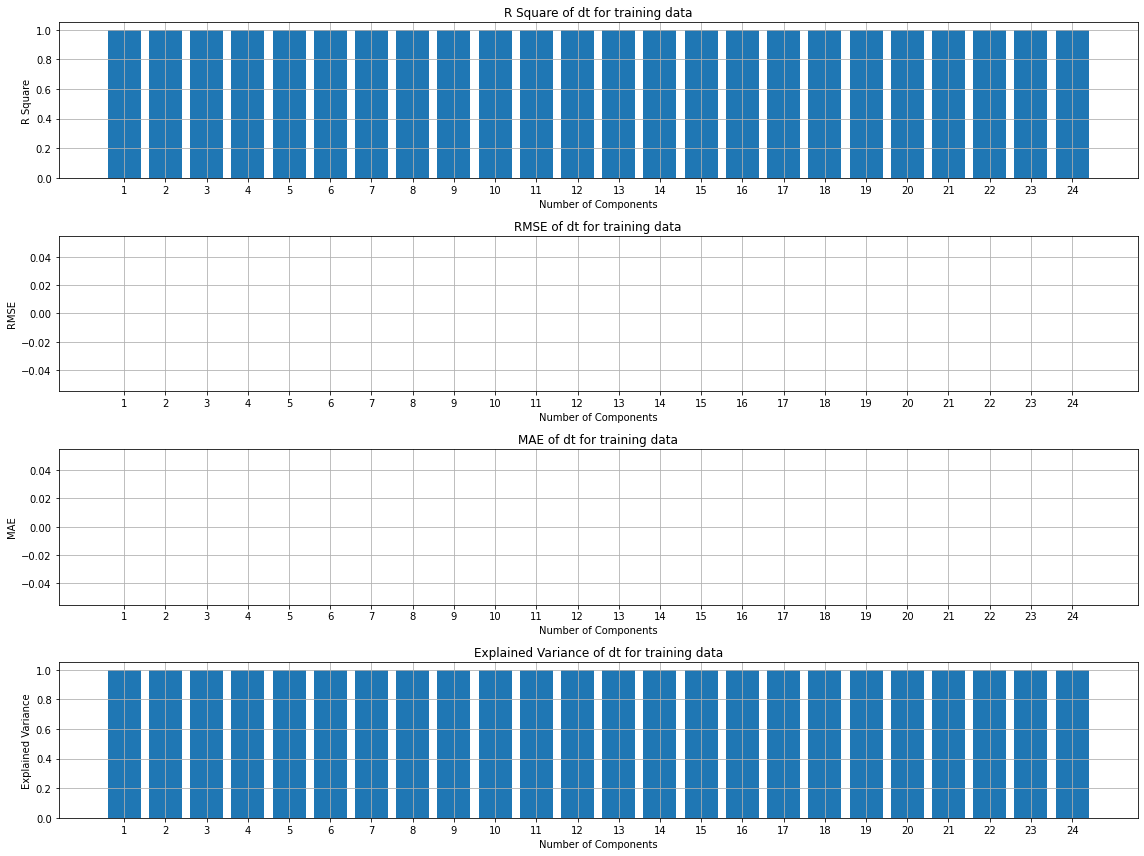

<Figure size 432x288 with 0 Axes>

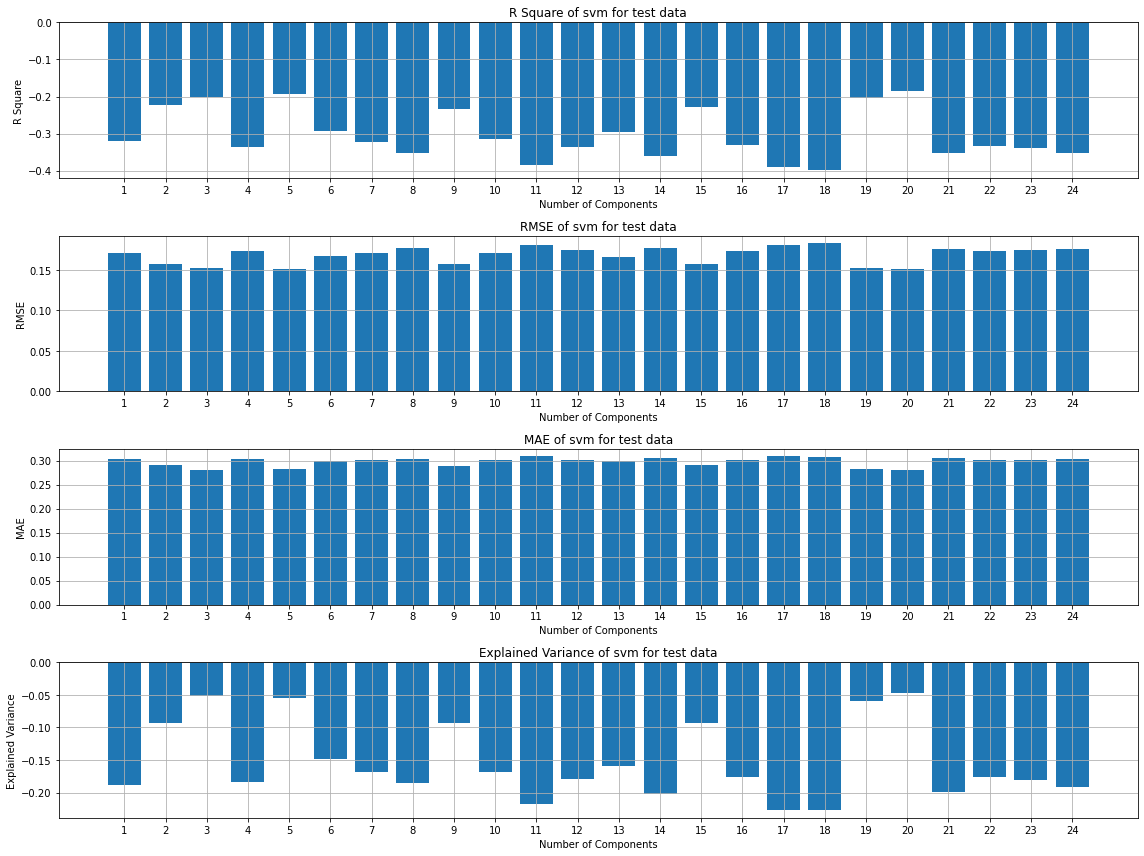

<Figure size 432x288 with 0 Axes>

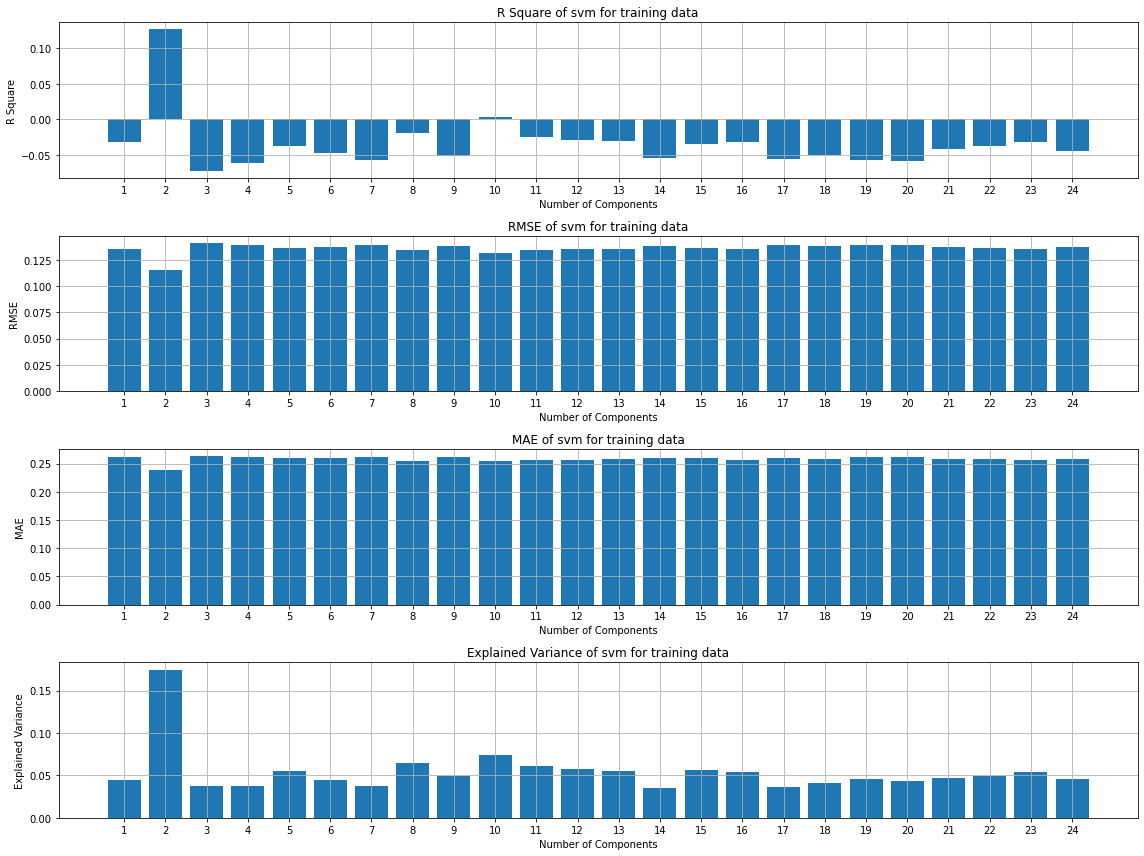

<Figure size 432x288 with 0 Axes>

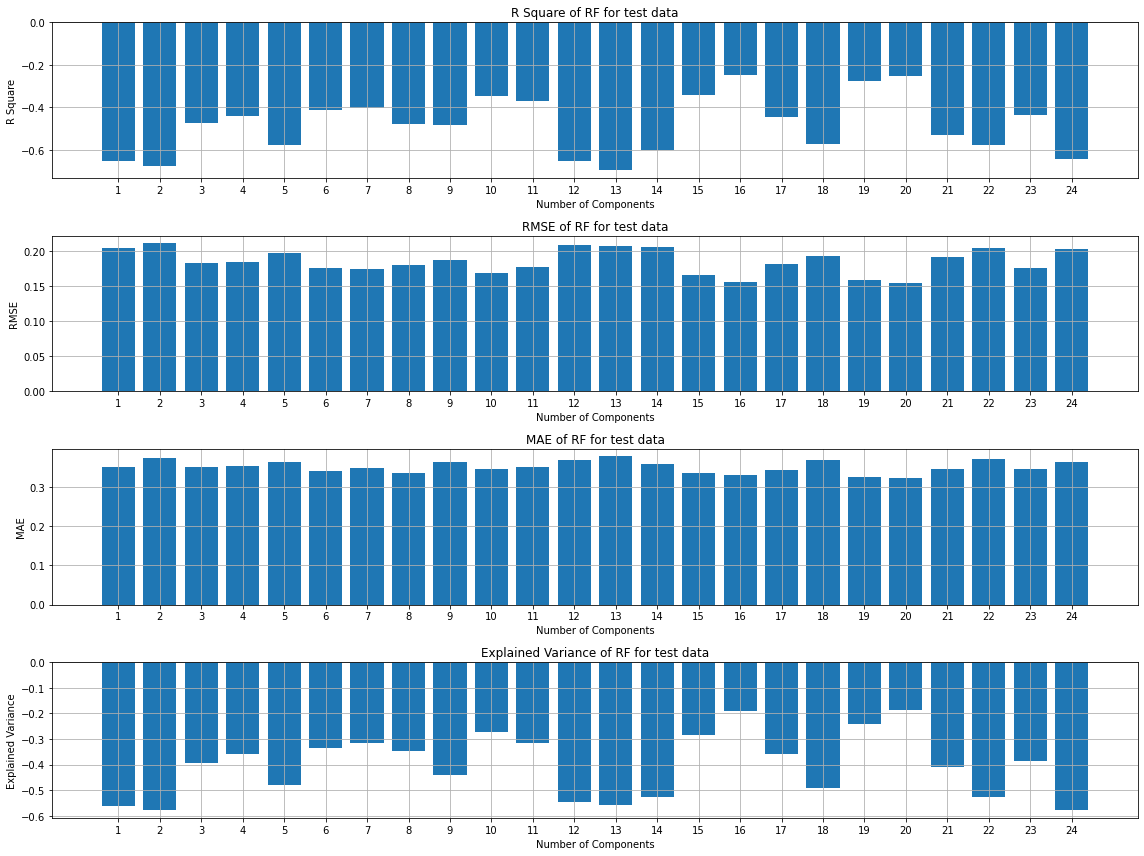

<Figure size 432x288 with 0 Axes>

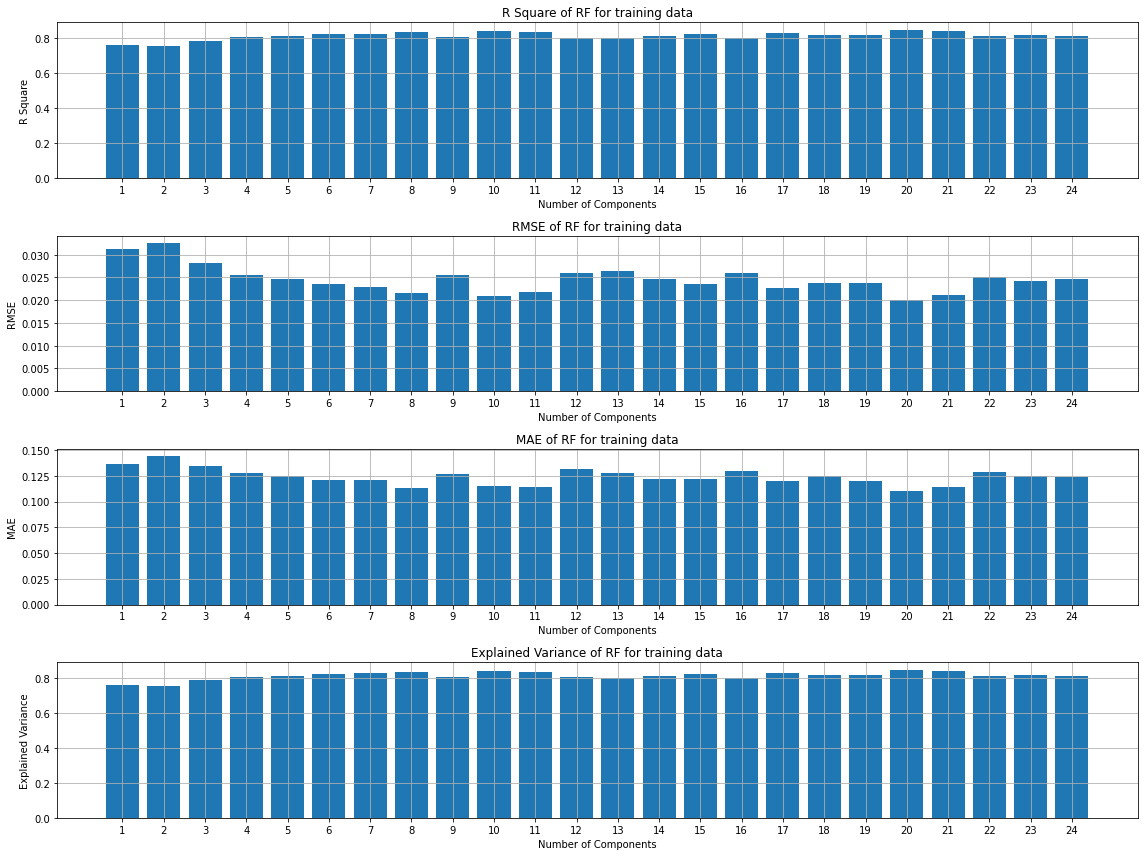

<Figure size 432x288 with 0 Axes>

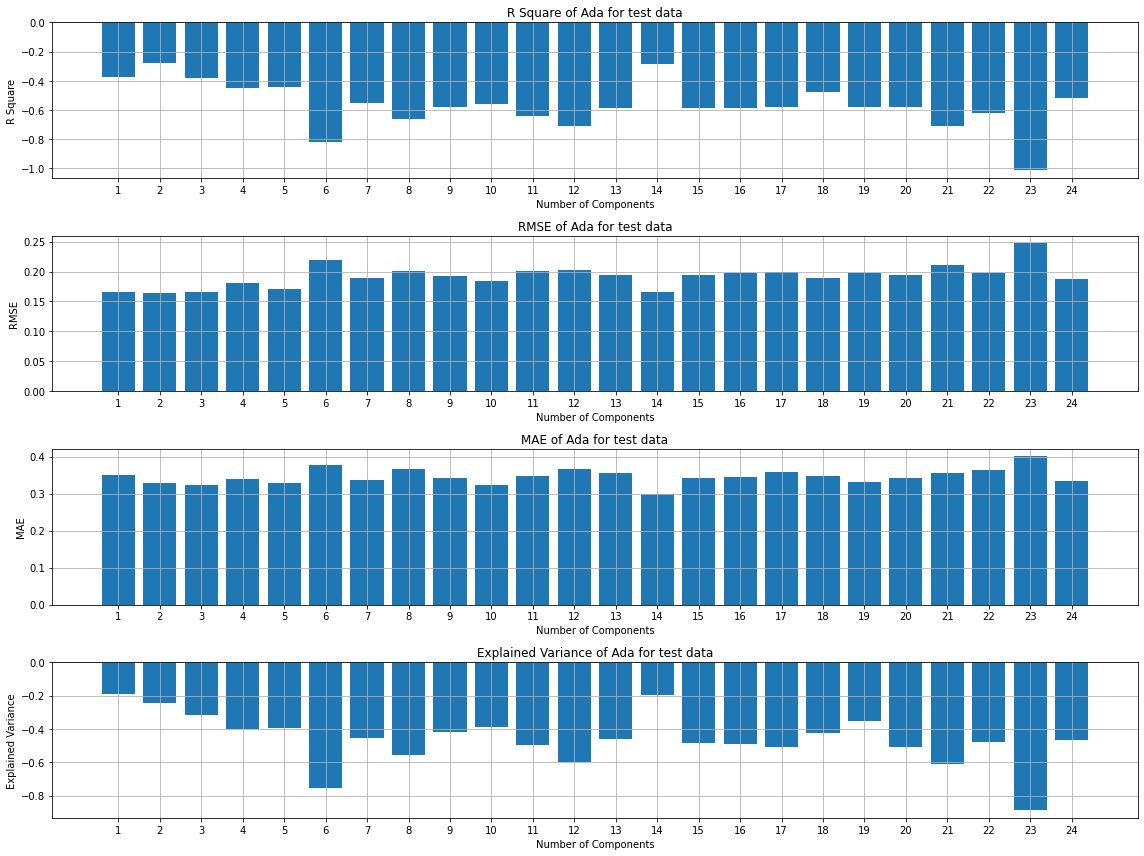

<Figure size 432x288 with 0 Axes>

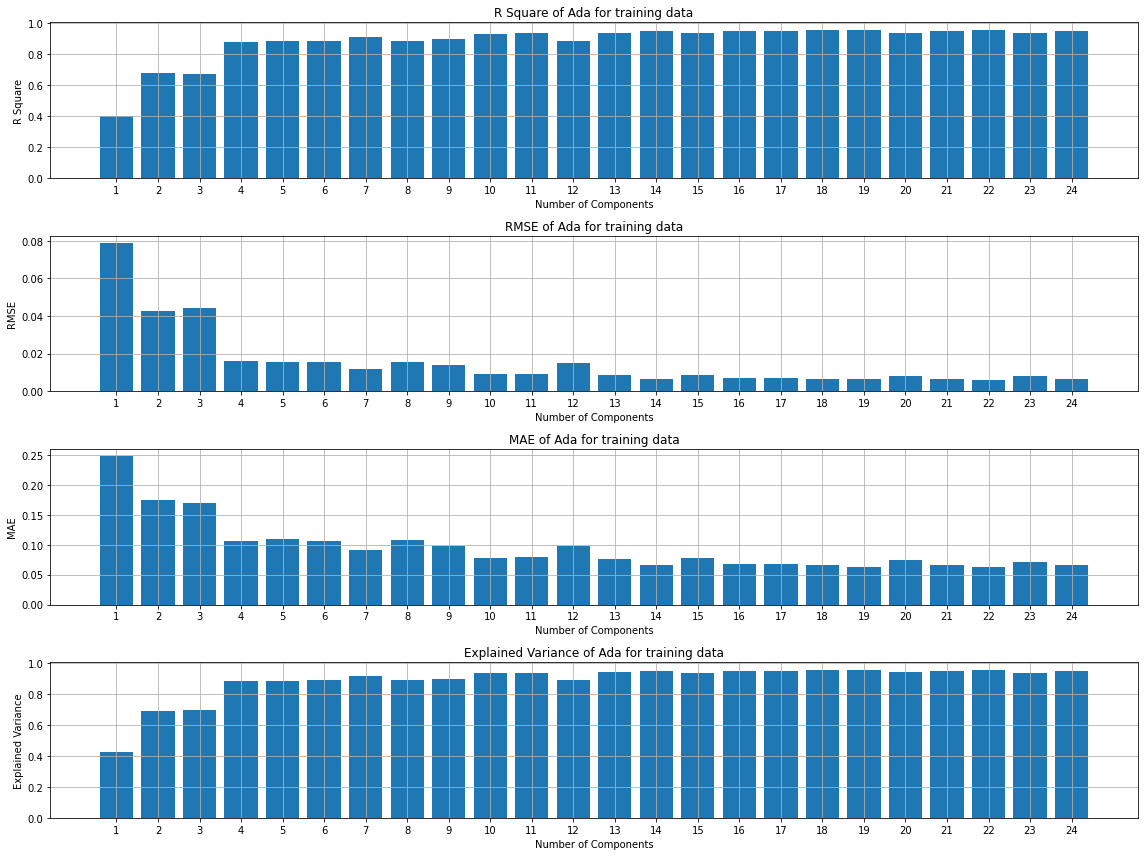

[15:20:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:21:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<Figure size 432x288 with 0 Axes>

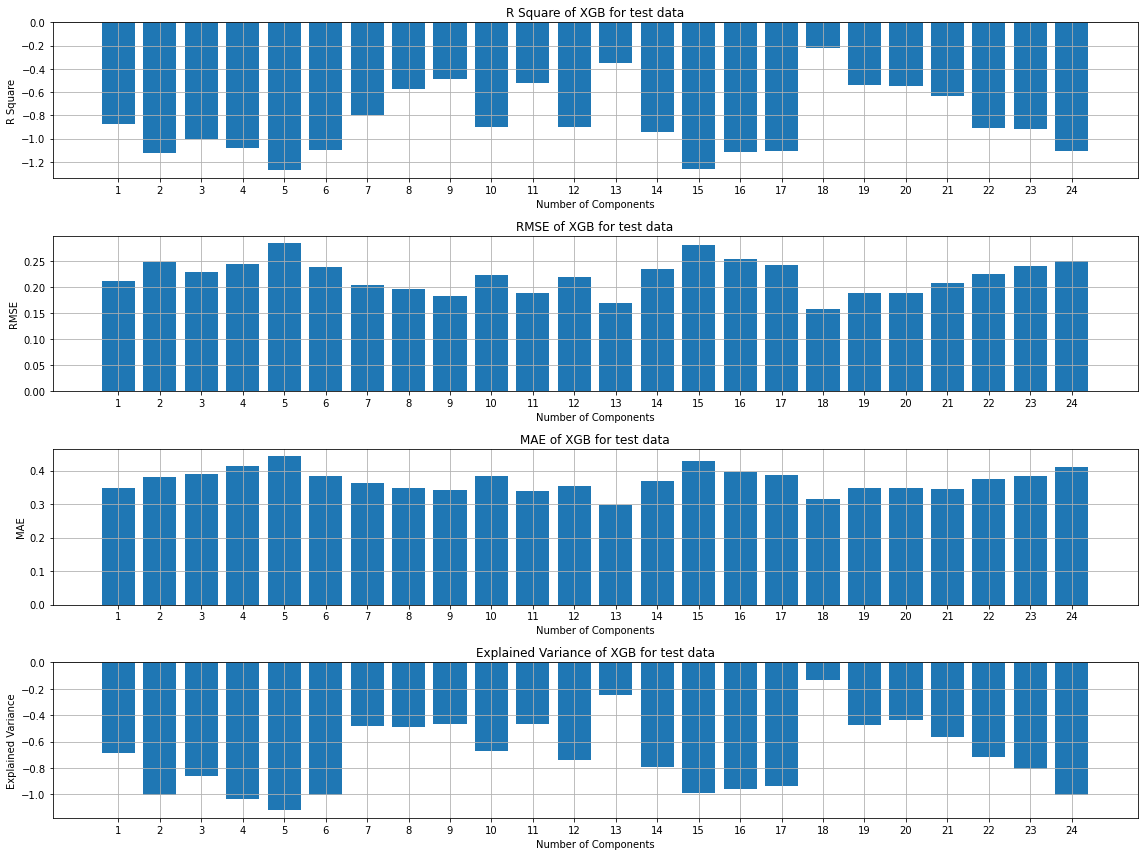

<Figure size 432x288 with 0 Axes>

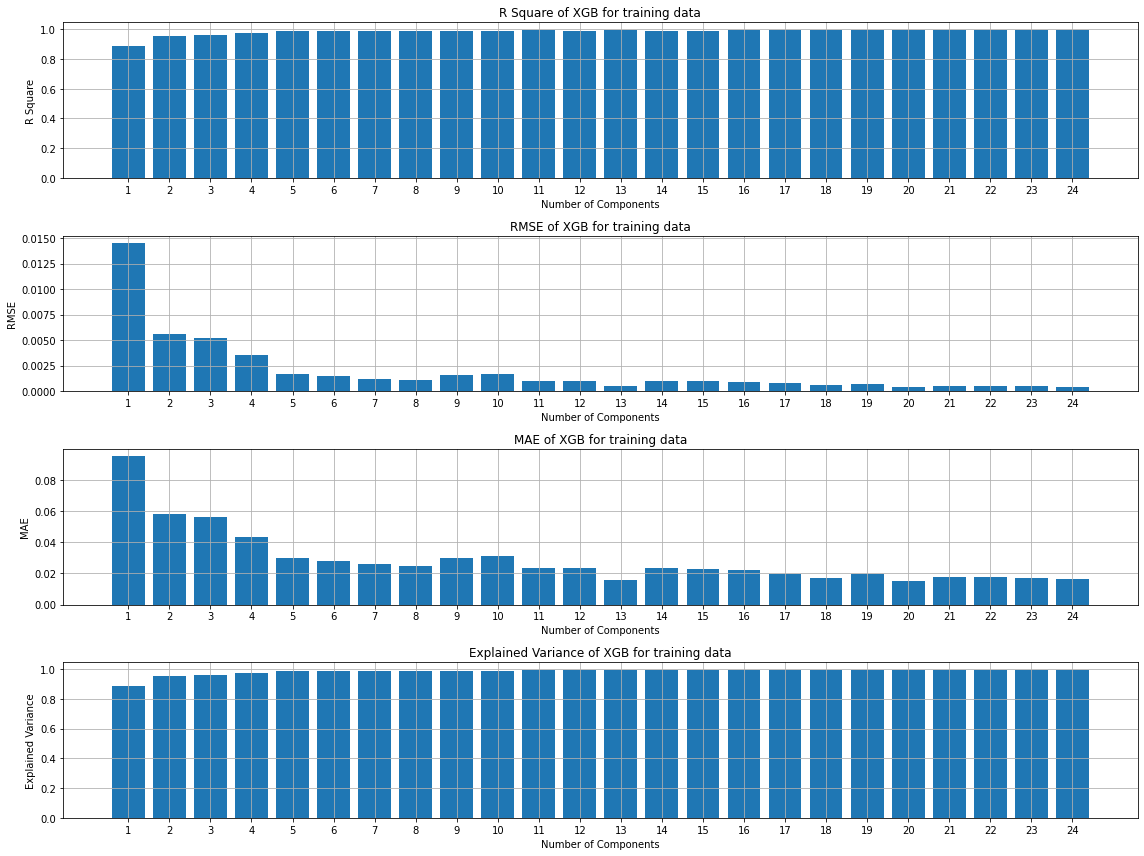

IndexError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
lis=['ols','ridge','lasso','bayesian','en','dt','svm','RF','Ada','XGB']
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import RepeatedKFold,KFold,StratifiedKFold,cross_validate
kf=KFold(n_splits=5)
models=[ols,ridge,lasso,bayesian,en,dt,sv,reg,regr,regx]
for i in range(11):
  mod=models[i]
  t_r2=[]
  t_rmse=[]
  t_mae=[]
  t_ev=[]
  tr_r2=[]
  tr_rmse=[]
  tr_mae=[]
  tr_ev=[]
  m=X_var.shape[1]+1
  for j in range(1,m):
    fit=umap.UMAP(n_components=j)
    x_var=fit.fit_transform(X_var)
    scores=cross_validate(mod,x_var,y_var,scoring=('explained_variance','r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
    t_r2.append(scores['test_r2'].mean())
    t_rmse.append(abs(scores['test_neg_mean_squared_error'].mean()))
    t_mae.append(abs(scores['test_neg_mean_absolute_error'].mean()))
    t_ev.append(scores['test_explained_variance'].mean())
    tr_r2.append(scores['train_r2'].mean())
    tr_rmse.append(abs(scores['train_neg_mean_squared_error'].mean()))
    tr_mae.append(abs(scores['train_neg_mean_absolute_error'].mean()))
    tr_ev.append(scores['train_explained_variance'].mean())
  br1 = np.arange(1,m)
  fig,ax=plt.subplots(4,1,figsize=(16,12))
  ax[0].bar(br1,t_r2)
  ax[0].set_title("R Square of "+lis[i]+" for test data")
  ax[0].set_ylabel("R Square")
  ax[0].set_xlabel("Number of Components")
  ax[0].grid()
  ax[0].set_xticks(range(1,m))
  ax[0].set_xticklabels(range(1,m))
  #ax[0].set_ylim(-1,1)
  ax[1].bar(br1,t_rmse)
  ax[1].set_title("RMSE of "+lis[i]+" for test data")
  ax[1].set_ylabel("RMSE")
  ax[1].set_xlabel("Number of Components")
  ax[1].grid()
  ax[1].set_xticks(range(1,m))
  ax[1].set_xticklabels(range(1,m))
  #ax[1].set_ylim(0,1)
  ax[2].bar(br1,t_mae)
  ax[2].set_title("MAE of "+lis[i]+" for test data")
  ax[2].set_ylabel("MAE")
  ax[2].set_xlabel("Number of Components")
  ax[2].grid()
  ax[2].set_xticks(range(1,m))
  ax[2].set_xticklabels(range(1,m))
  #ax[2].set_ylim(0,1)
  ax[3].bar(br1,t_ev)
  ax[3].set_title("Explained Variance of "+lis[i]+" for test data")
  ax[3].set_ylabel("Explained Variance")
  ax[3].set_xlabel("Number of Components")
  ax[3].grid()
  ax[3].set_xticks(range(1,m))
  ax[3].set_xticklabels(range(1,m))
  #ax[3].set_ylim(-1,1)
  plt.tight_layout()
  plt.show()
  plt.savefig(lis[i]+'MetricesTest'+'.png')
  fig,ax=plt.subplots(4,1,figsize=(16,12))
  ax[0].bar(br1,tr_r2)
  ax[0].set_title("R Square of "+lis[i]+" for training data")
  ax[0].set_ylabel("R Square")
  ax[0].set_xlabel("Number of Components")
  ax[0].grid()
  ax[0].set_xticks(range(1,m))
  ax[0].set_xticklabels(range(1,m))
  #ax[0].set_ylim(-1,1)
  ax[1].bar(br1,tr_rmse)
  ax[1].set_title("RMSE of "+lis[i]+" for training data")
  ax[1].set_ylabel("RMSE")
  ax[1].set_xlabel("Number of Components")
  ax[1].grid()
  ax[1].set_xticks(range(1,m))
  ax[1].set_xticklabels(range(1,m))
  #ax[1].set_ylim(0,1)
  ax[2].bar(br1,tr_mae)
  ax[2].set_title("MAE of "+lis[i]+" for training data")
  ax[2].set_ylabel("MAE")
  ax[2].set_xlabel("Number of Components")
  ax[2].grid()
  ax[2].set_xticks(range(1,m))
  ax[2].set_xticklabels(range(1,m))
  #ax[2].set_ylim(0,1)
  ax[3].bar(br1,tr_ev)
  ax[3].set_title("Explained Variance of "+lis[i]+" for training data")
  ax[3].set_ylabel("Explained Variance")
  ax[3].set_xlabel("Number of Components")
  ax[3].grid()
  ax[3].set_xticks(range(1,m))
  ax[3].set_xticklabels(range(1,m))
  #ax[3].set_ylim(-1,1)
  plt.tight_layout()
  plt.show()
  plt.savefig(lis[i]+'MetricesTrain'+'.png')

In [ ]:
lis=['ols','ridge','lasso','bayesian','en','dt','svm','RF','Ada','XGB']
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import RepeatedKFold,KFold,StratifiedKFold,cross_validate
kf=KFold(n_splits=5)
# 1. OLS
models=[ols,ridge,lasso,bayesian,en,dt,sv,reg,regr,regx]
arr=np.zeros((10,4))
for i in range(10):
  mod=models[i]
  scores=cross_validate(mod,X_var,y_var,scoring=('explained_variance','r2','neg_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
  arr[i,0]=scores['train_r2'].mean()
  arr[i,1]=abs(scores['train_neg_mean_squared_error'].mean())
  arr[i,2]=abs(scores['train_neg_mean_absolute_error'].mean())
  arr[i,3]=scores['train_explained_variance'].mean()
evals=pd.DataFrame(arr,columns=['R2','MSE','MAE','EV'])
evals.insert(0,'model',lis)
print(evals)